<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/E_Commerce_Fraud_Detection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/transactions (2).csv')
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,299695.0,149848.000000,86514.638800,1.00,74924.50,149848.00,224771.50,299695.00
user_id,299695.0,3002.559432,1732.309663,1.00,1501.00,3007.00,4504.00,6000.00
account_age_days,299695.0,973.397871,525.241409,1.00,516.00,975.00,1425.00,1890.00
total_transactions_user,299695.0,50.673321,5.976391,40.00,46.00,51.00,56.00,60.00
avg_amount_user,299695.0,148.142973,200.364624,3.52,46.19,90.13,173.45,4565.29
amount,299695.0,177.165279,306.926507,1.00,42.10,89.99,191.11,16994.74
promo_used,299695.0,0.153640,0.360603,0.00,0.00,0.00,0.00,1.00
avs_match,299695.0,0.837999,0.368453,0.00,1.00,1.00,1.00,1.00
cvv_result,299695.0,0.872110,0.333968,0.00,1.00,1.00,1.00,1.00
three_ds_flag,299695.0,0.784588,0.411109,0.00,1.00,1.00,1.00,1.00


In [7]:
df.isna().sum()

,0
transaction_id,0
user_id,0
account_age_days,0
total_transactions_user,0
avg_amount_user,0
amount,0
country,0
bin_country,0
channel,0
merchant_category,0


In [8]:
df.columns

Index(['transaction_id', 'user_id', 'account_age_days',
       'total_transactions_user', 'avg_amount_user', 'amount', 'country',
       'bin_country', 'channel', 'merchant_category', 'promo_used',
       'avs_match', 'cvv_result', 'three_ds_flag', 'transaction_time',
       'shipping_distance_km', 'is_fraud'],
      dtype='object')

In [9]:
df.nunique()

,0
transaction_id,299695
user_id,6000
account_age_days,1801
total_transactions_user,21
avg_amount_user,5347
amount,60043
country,10
bin_country,10
channel,2
merchant_category,5


In [10]:
df['channel'].unique()

array(['web', 'app'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

In [12]:
numerical_col = ['account_age_days','total_transactions_user',
                 'avg_amount_user','amount','promo_used','avs_match','cvv_result',
                 'three_ds_flag','shipping_distance_km']

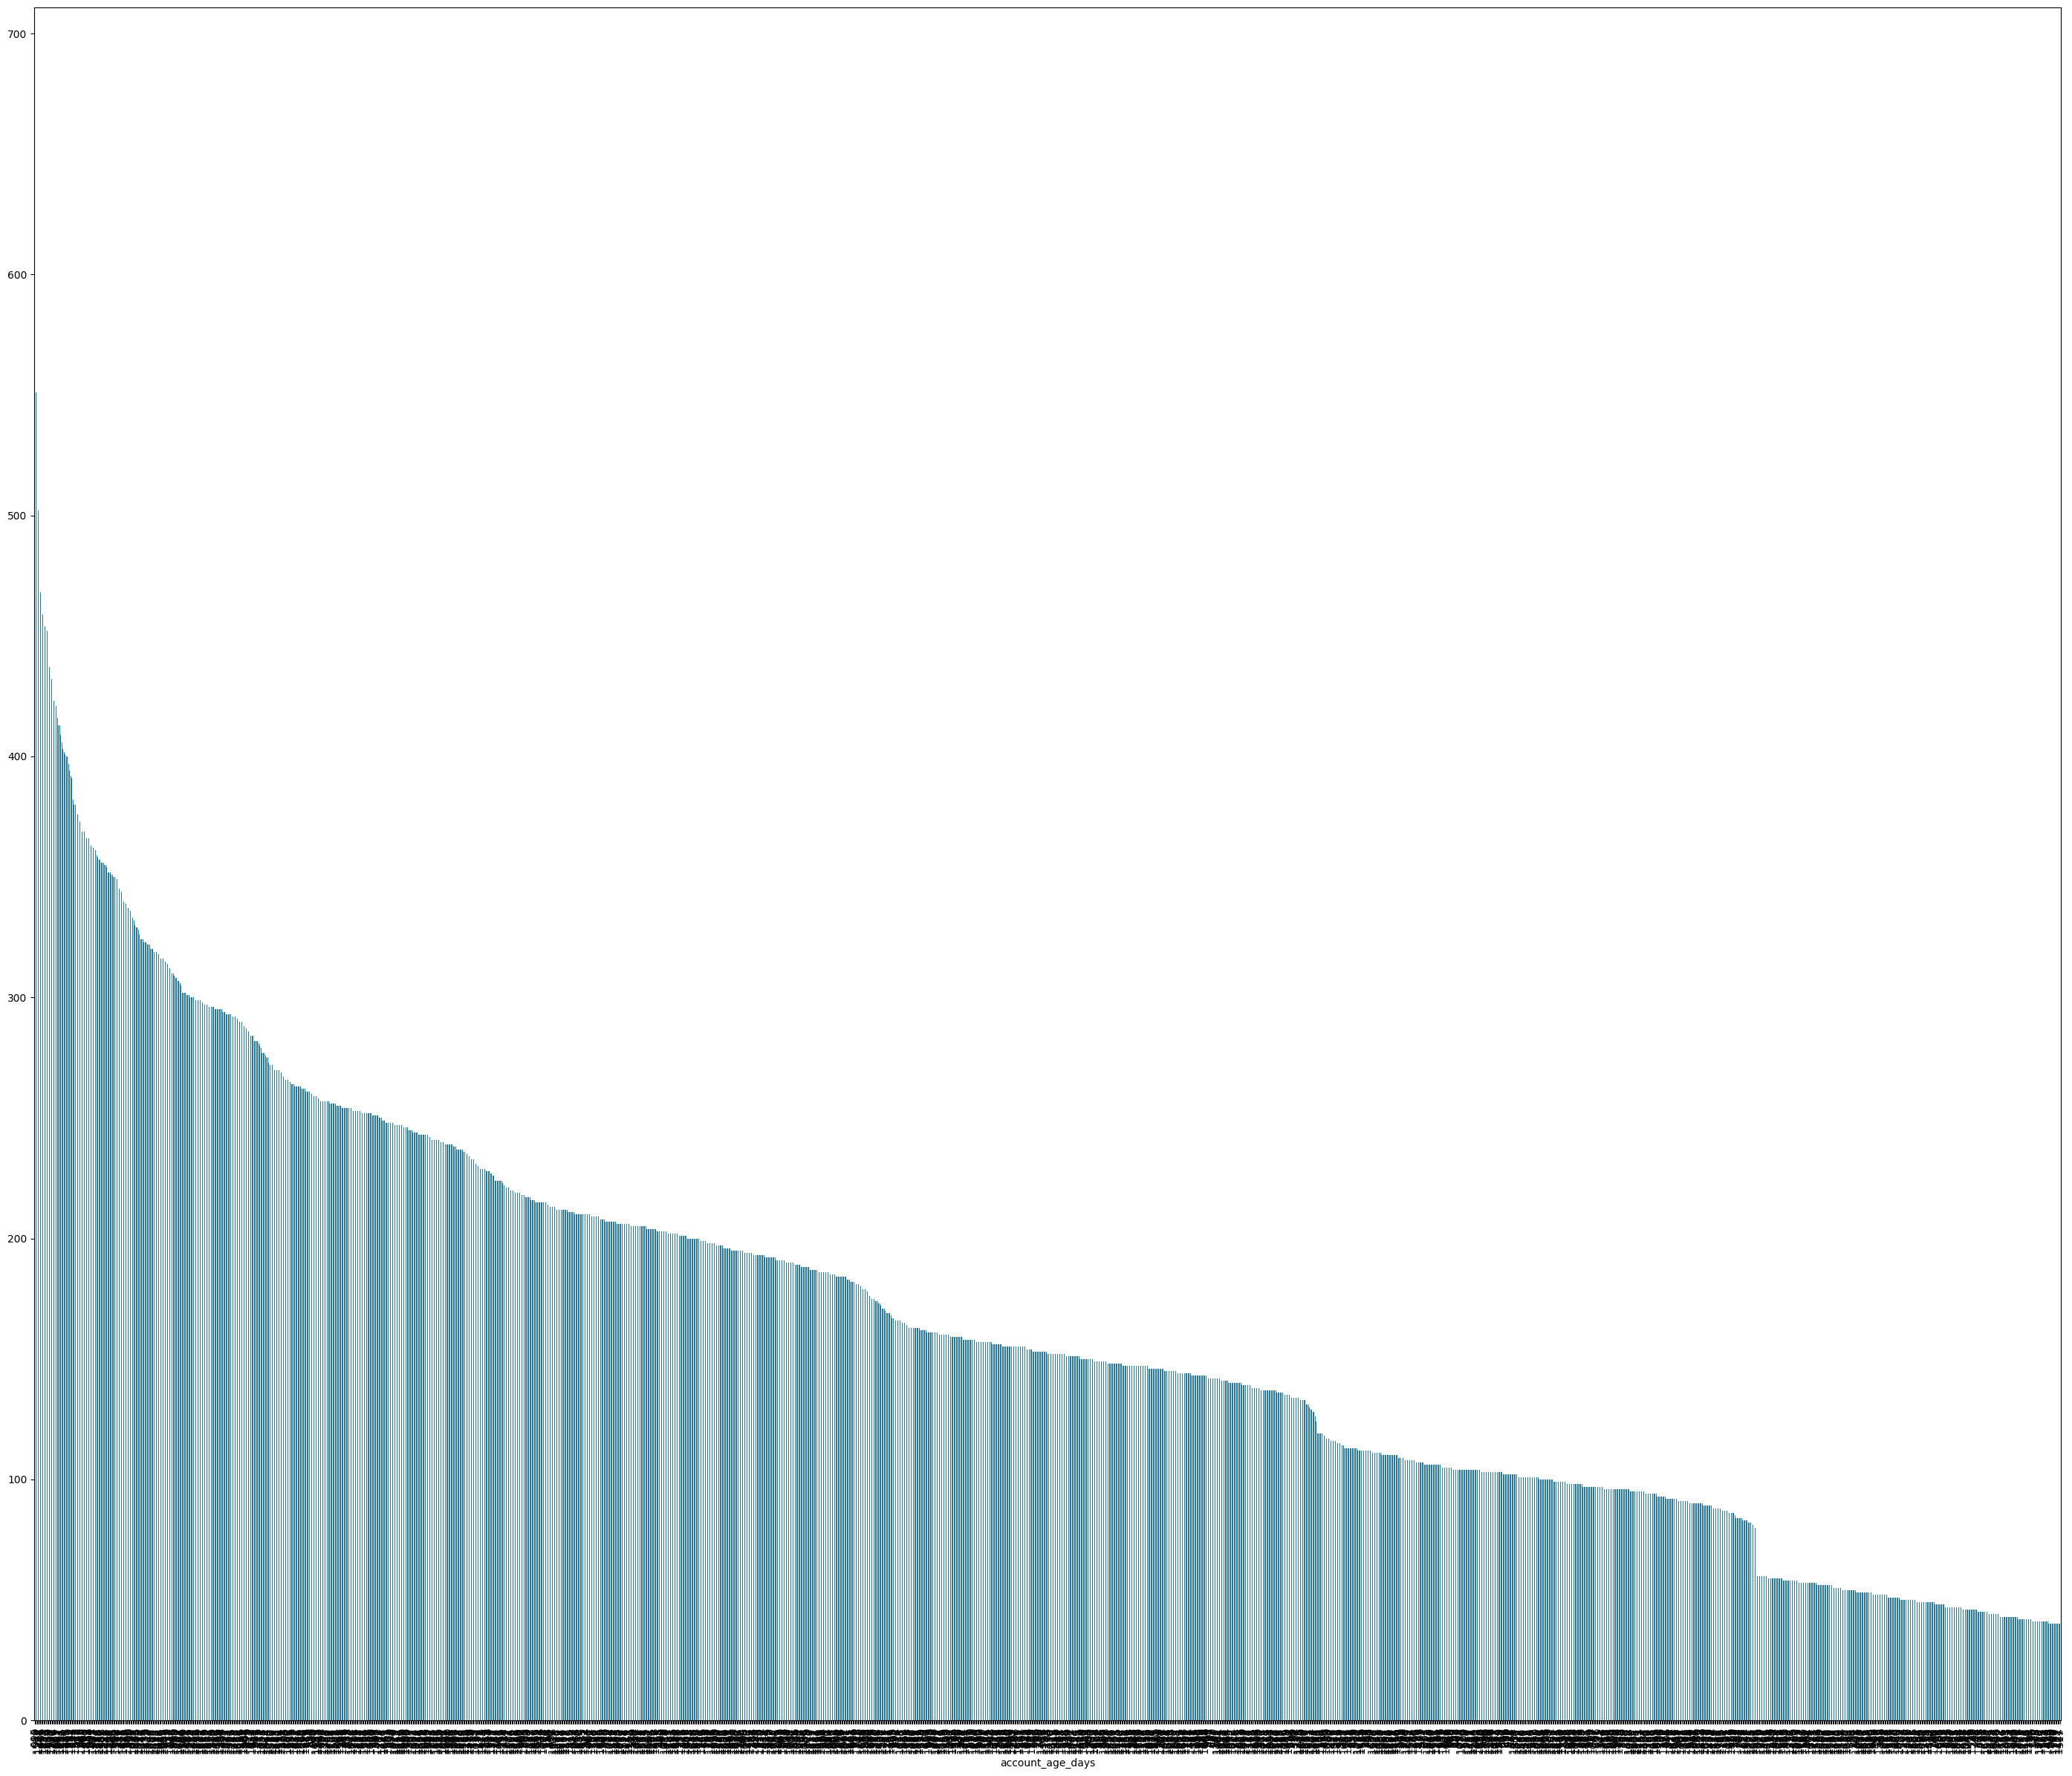

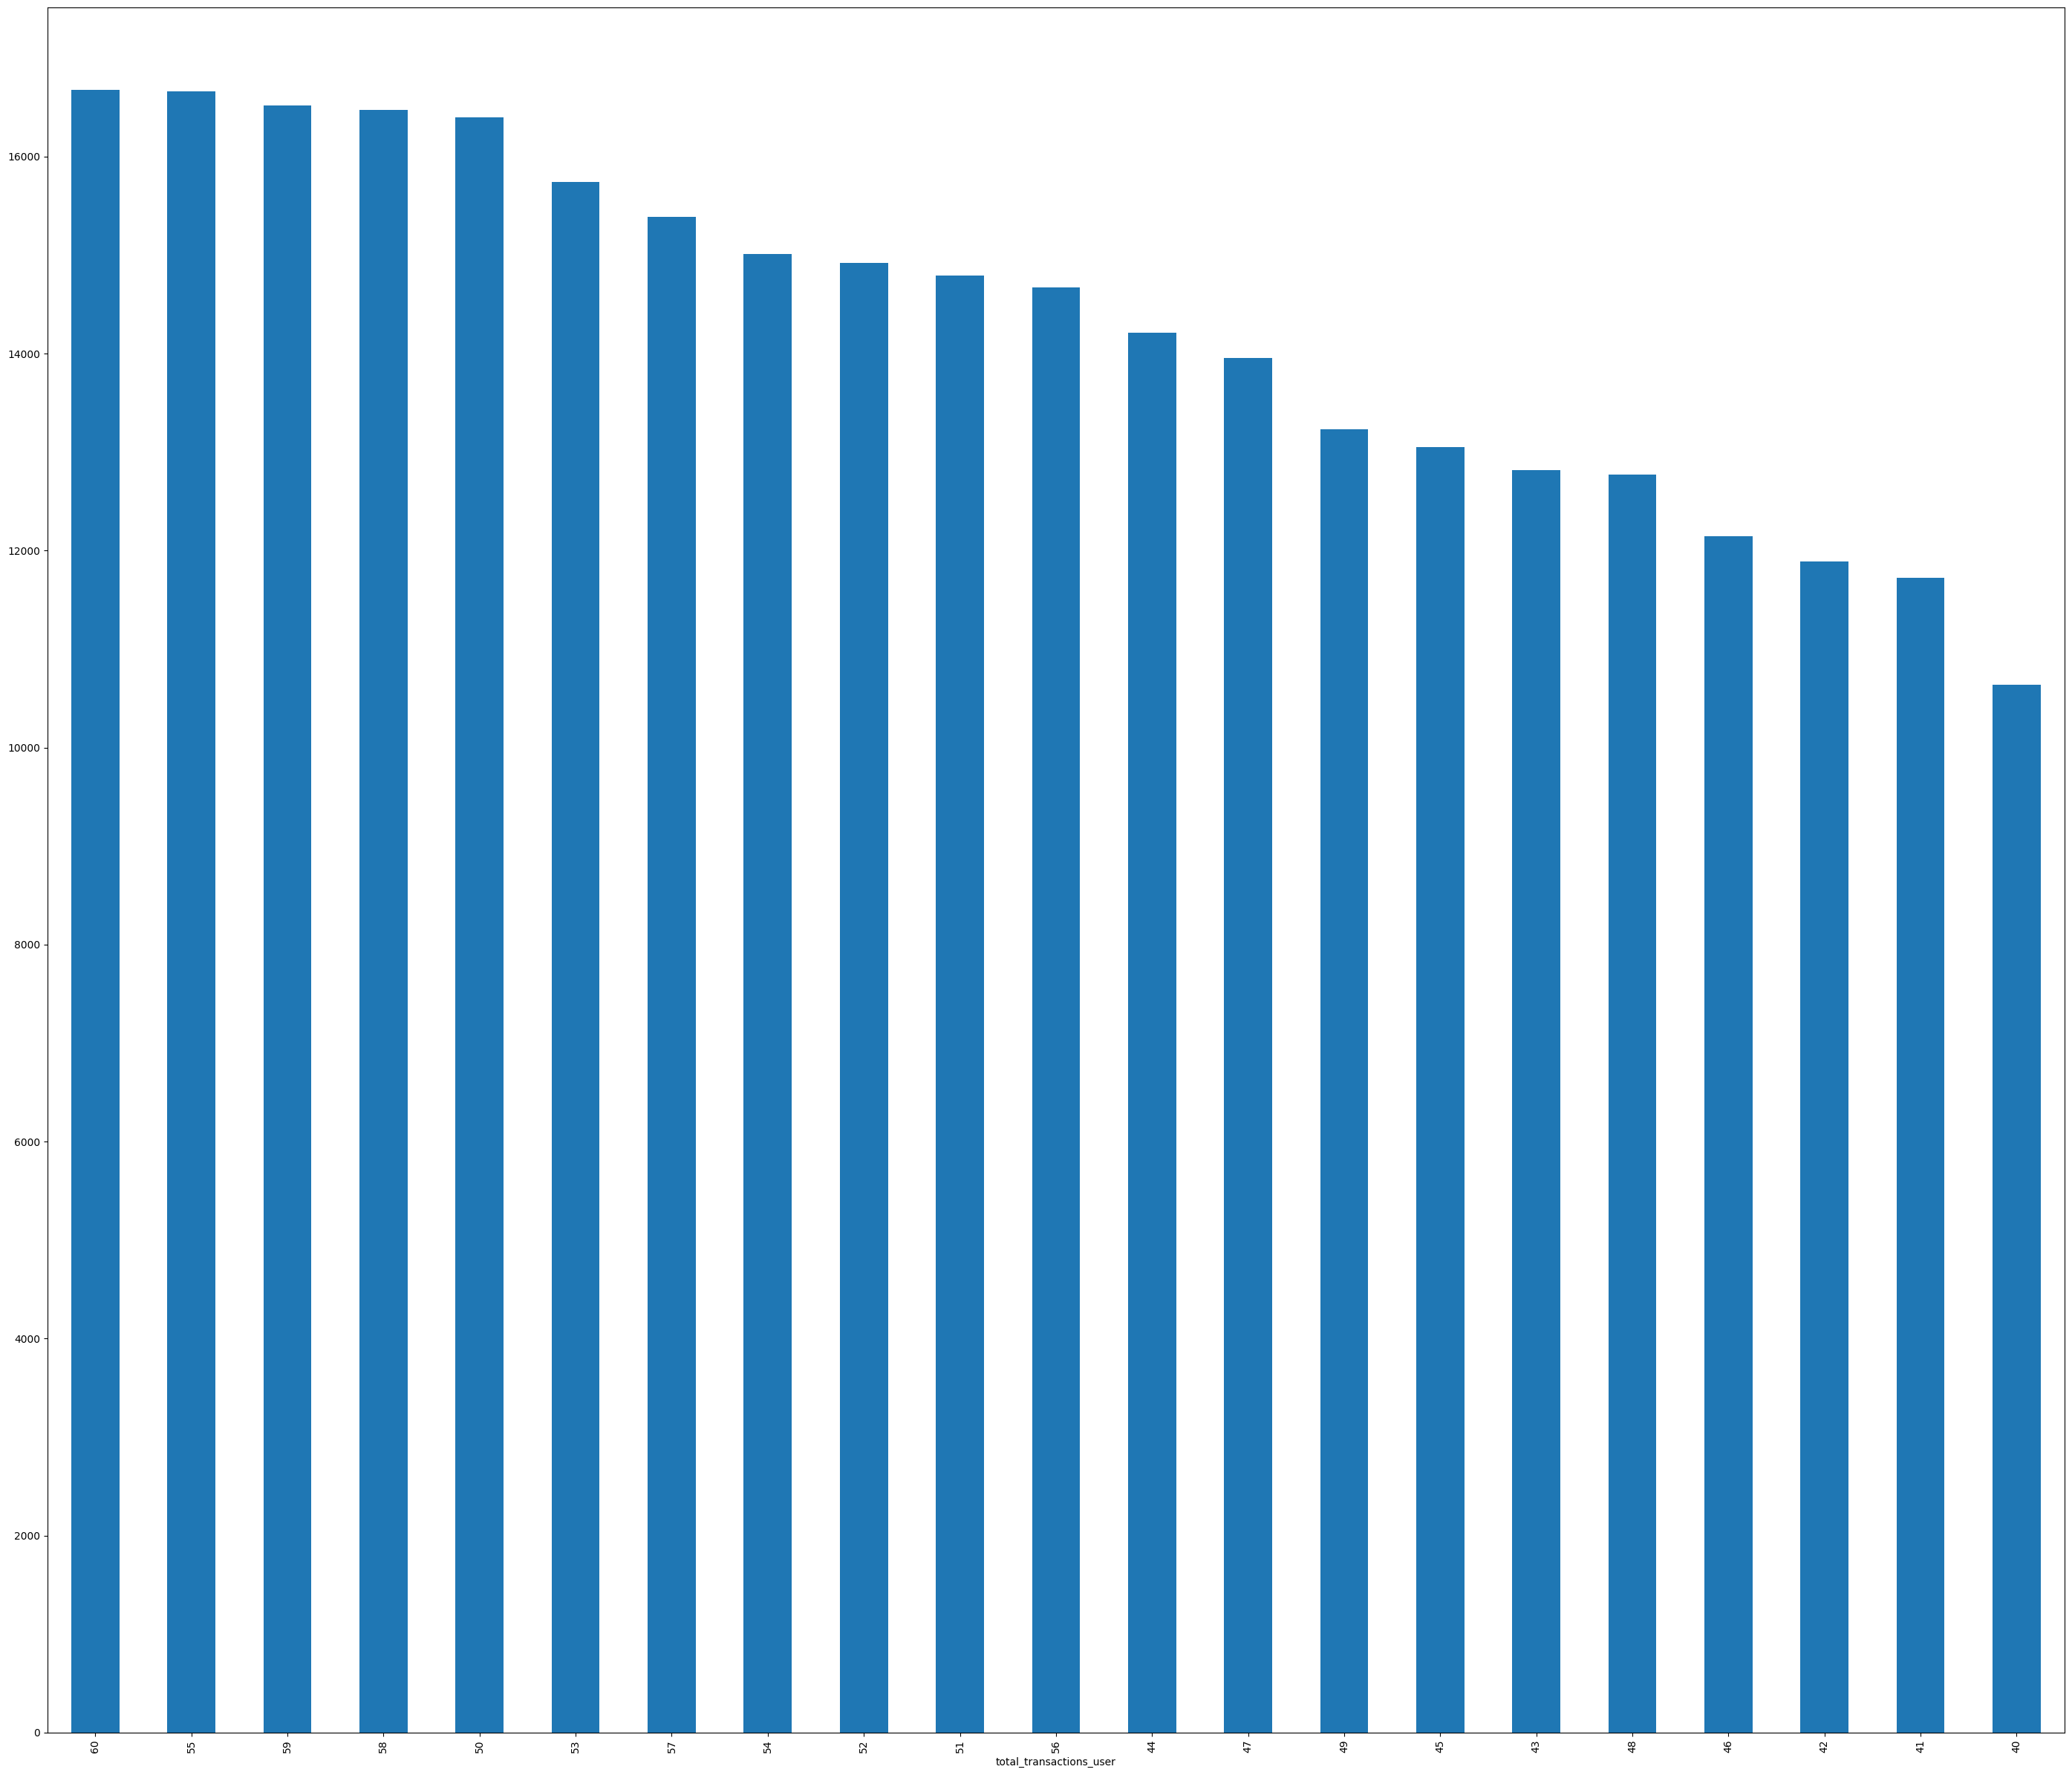

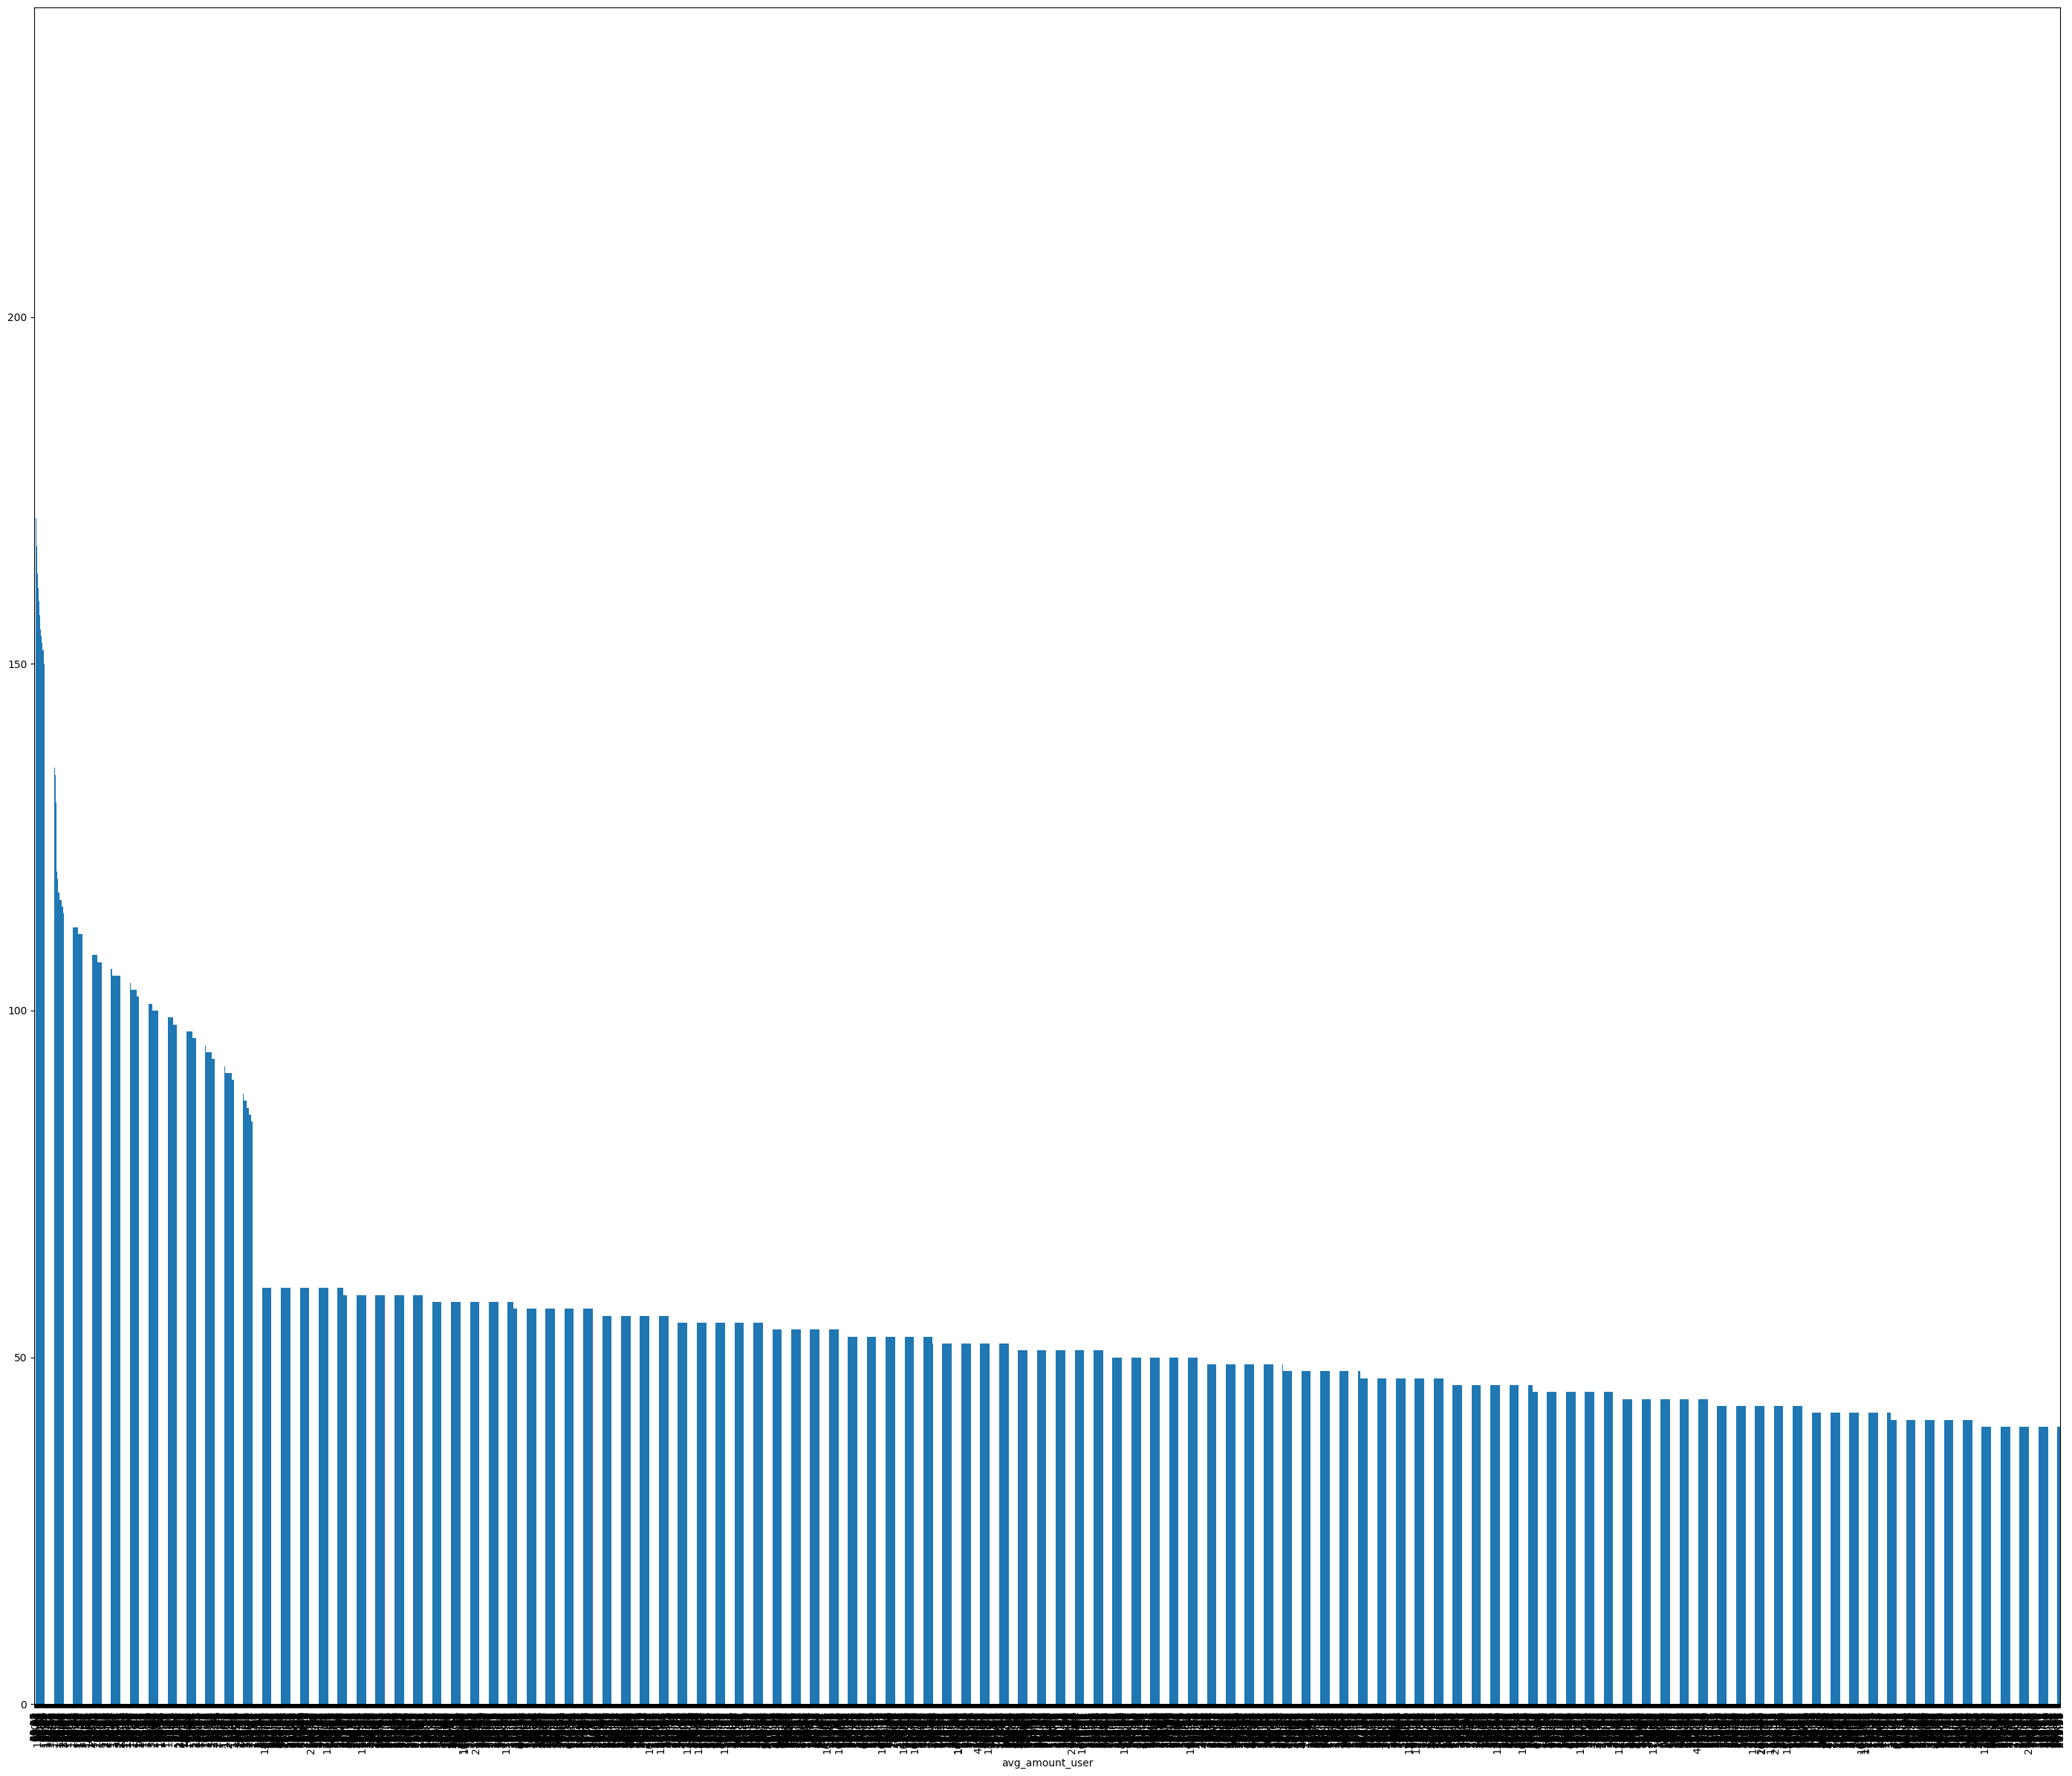

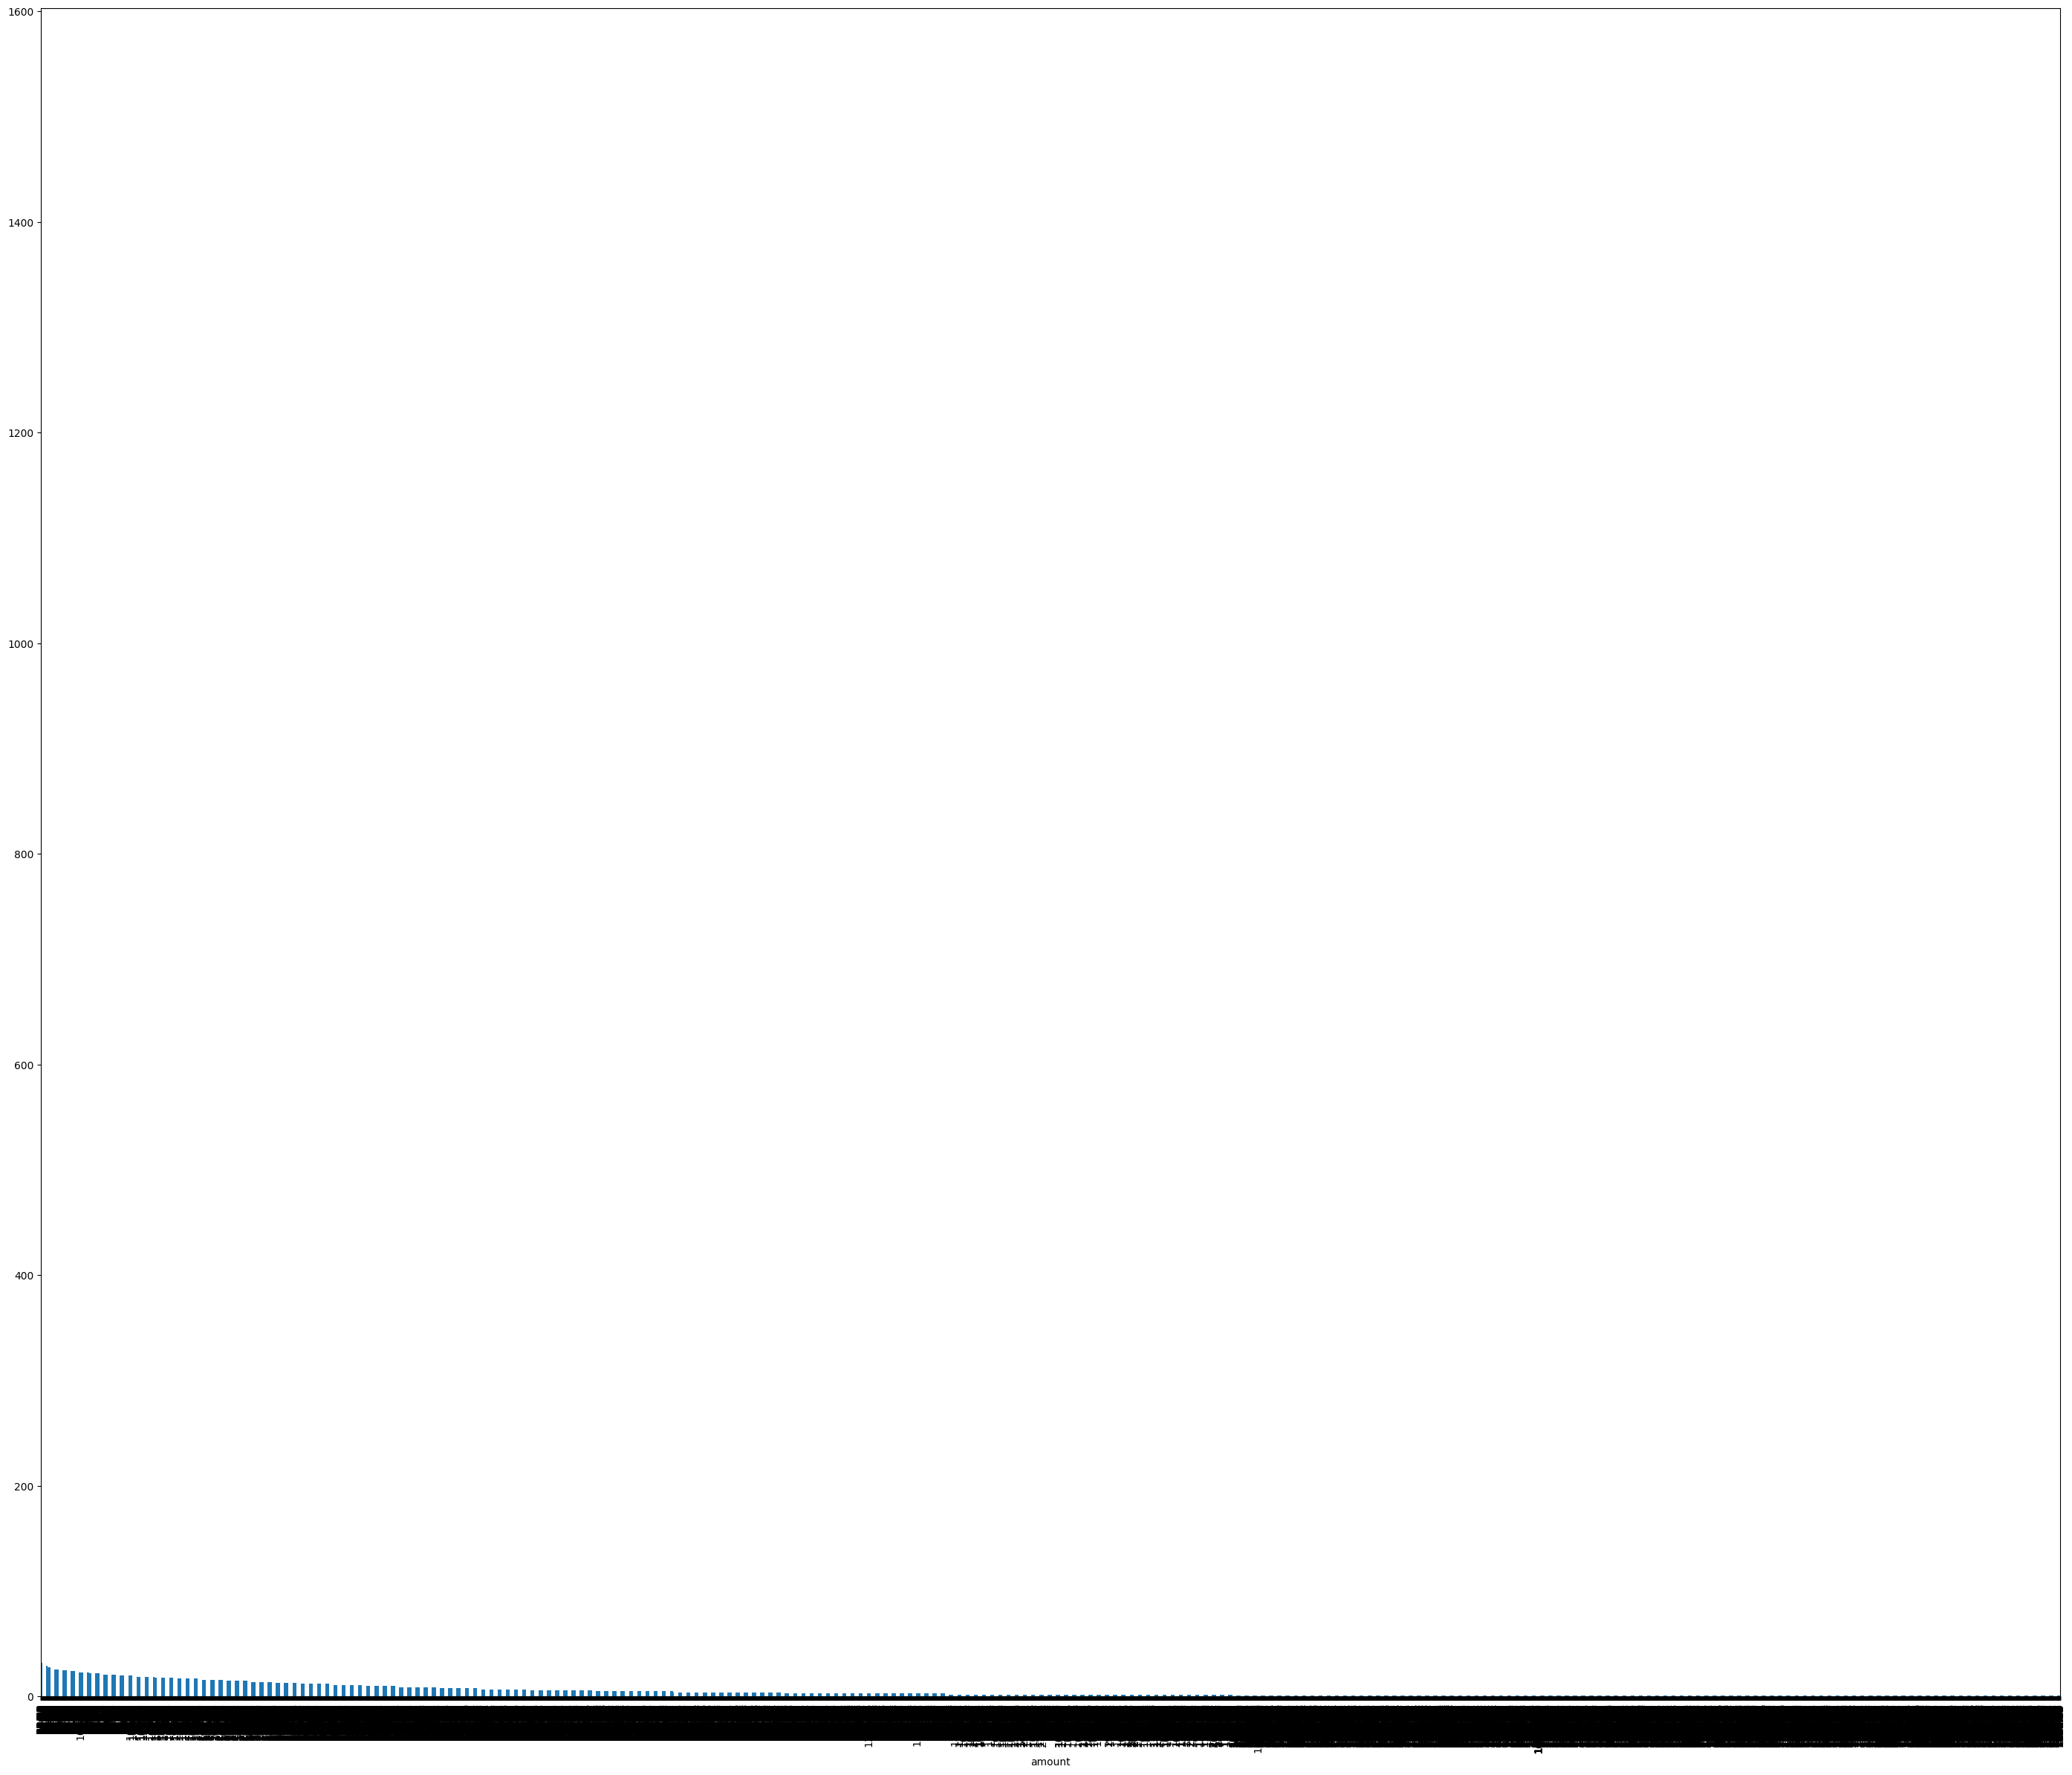

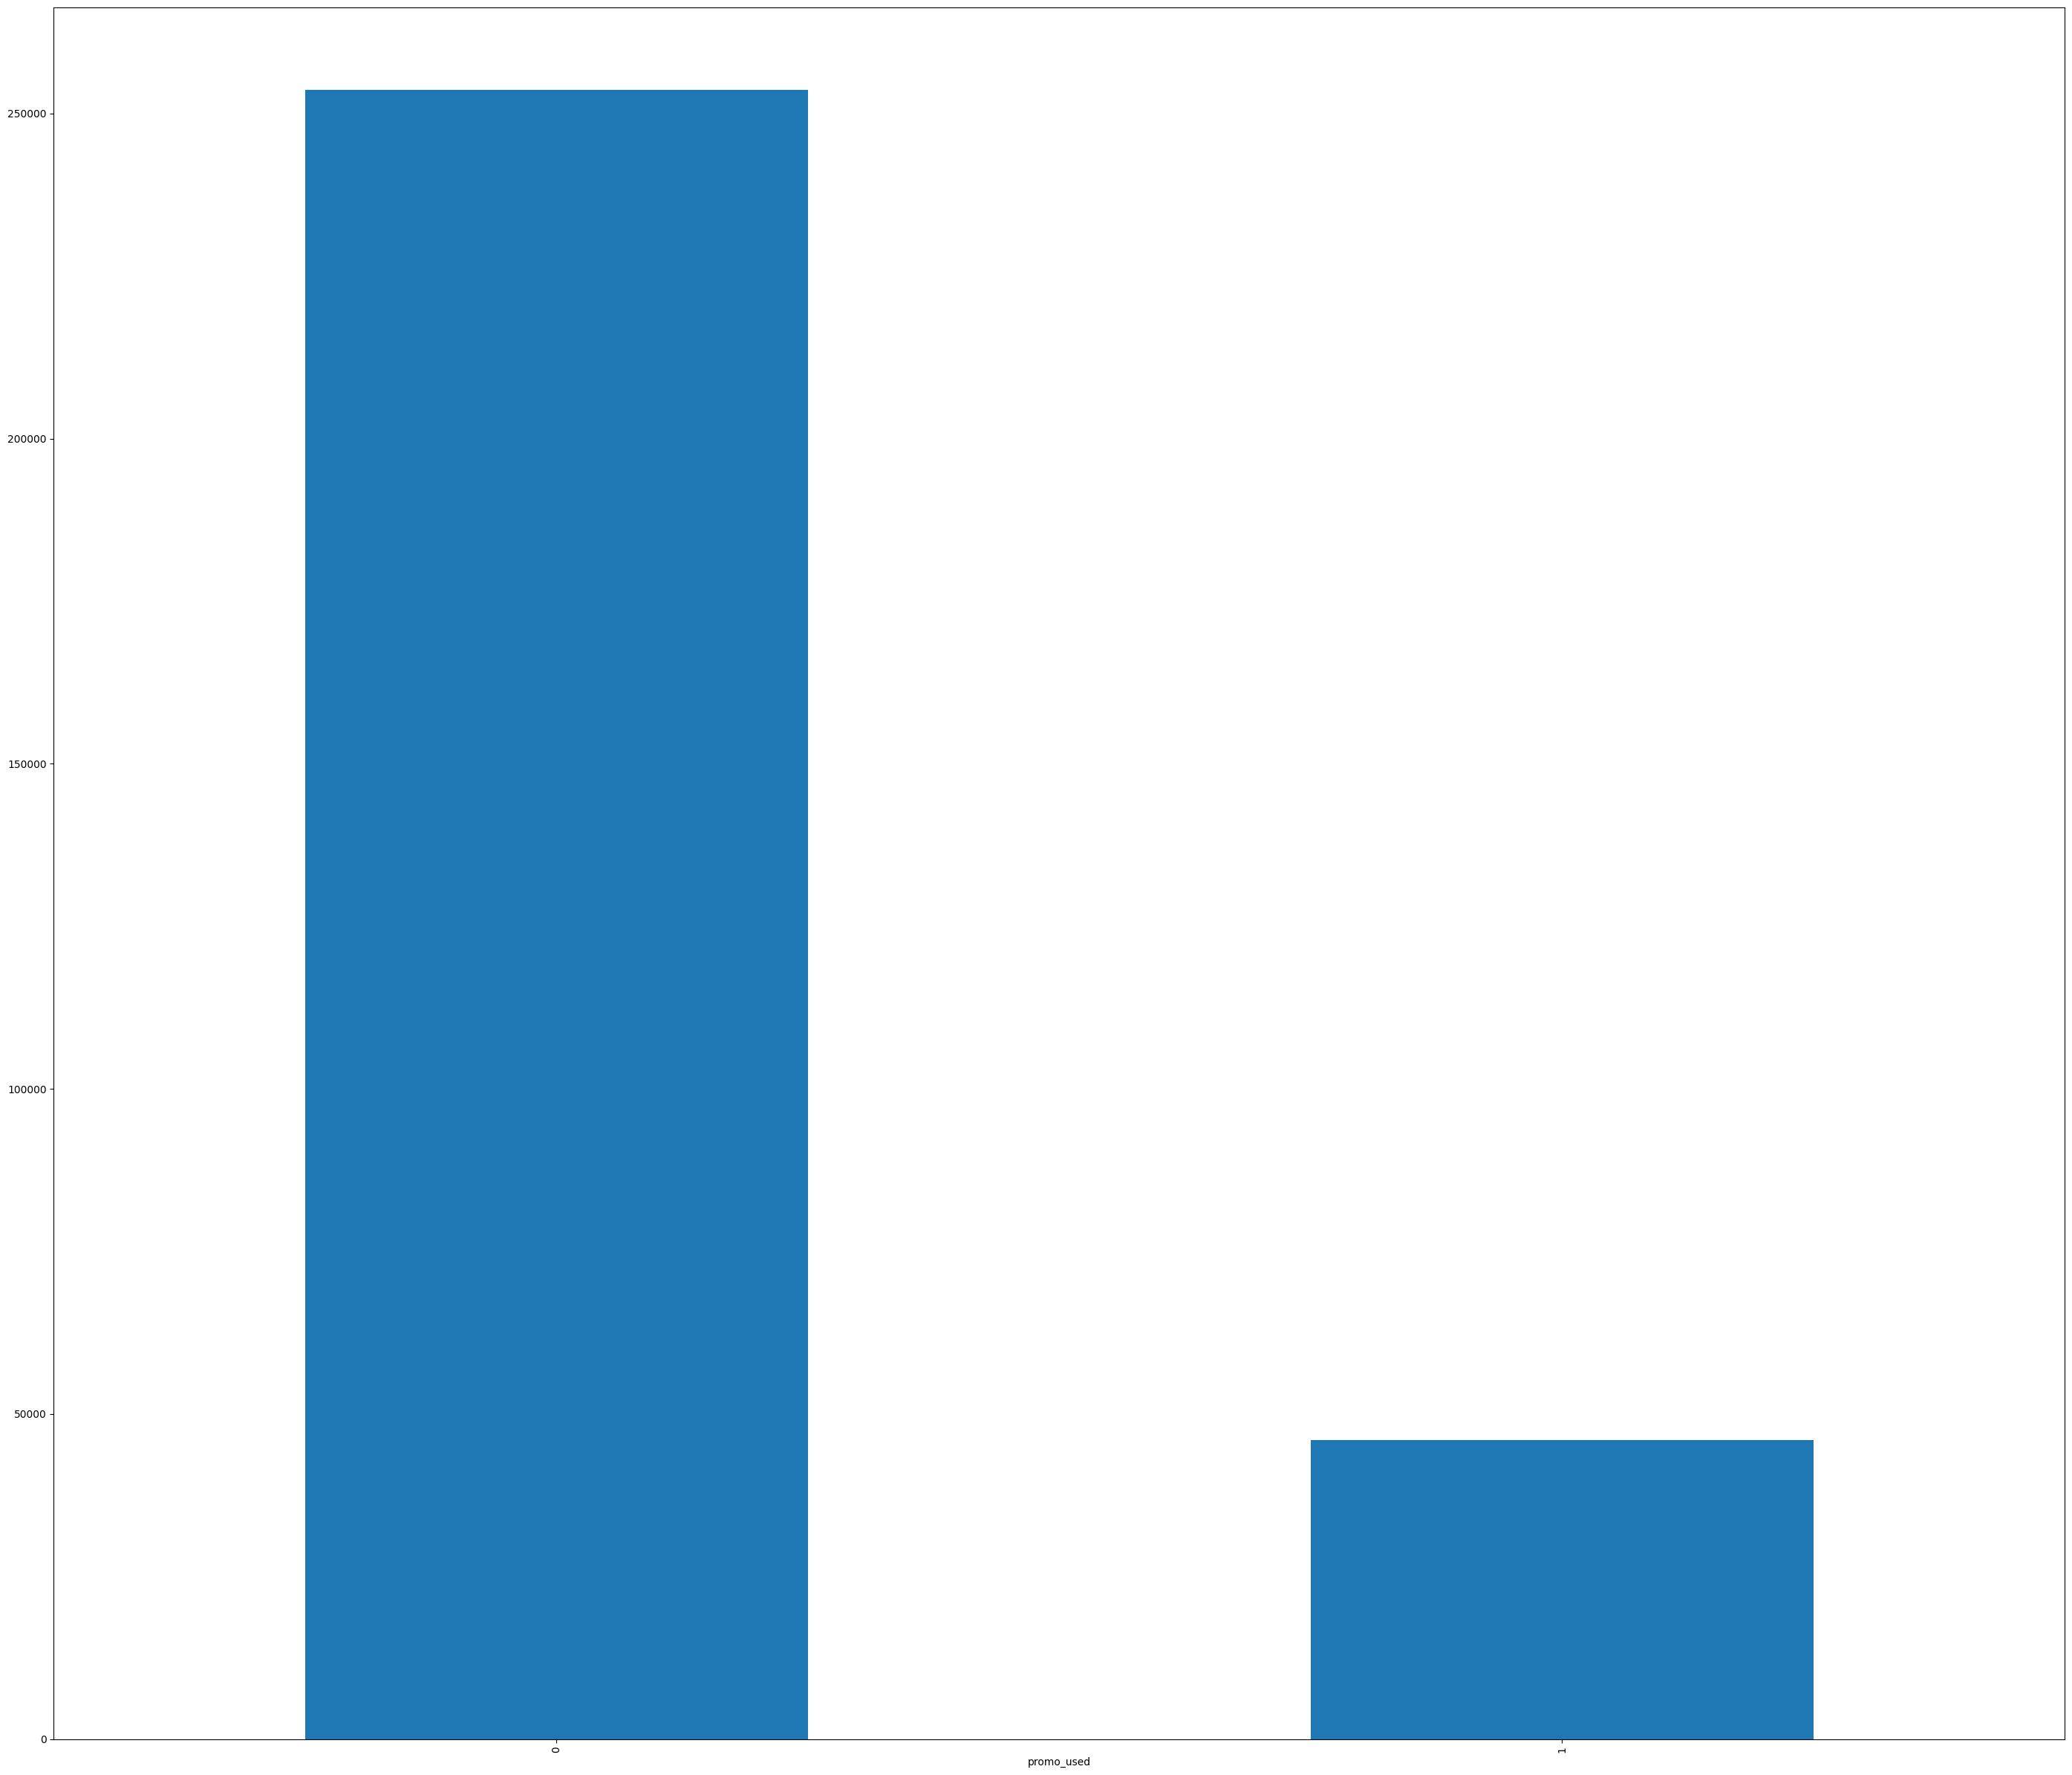

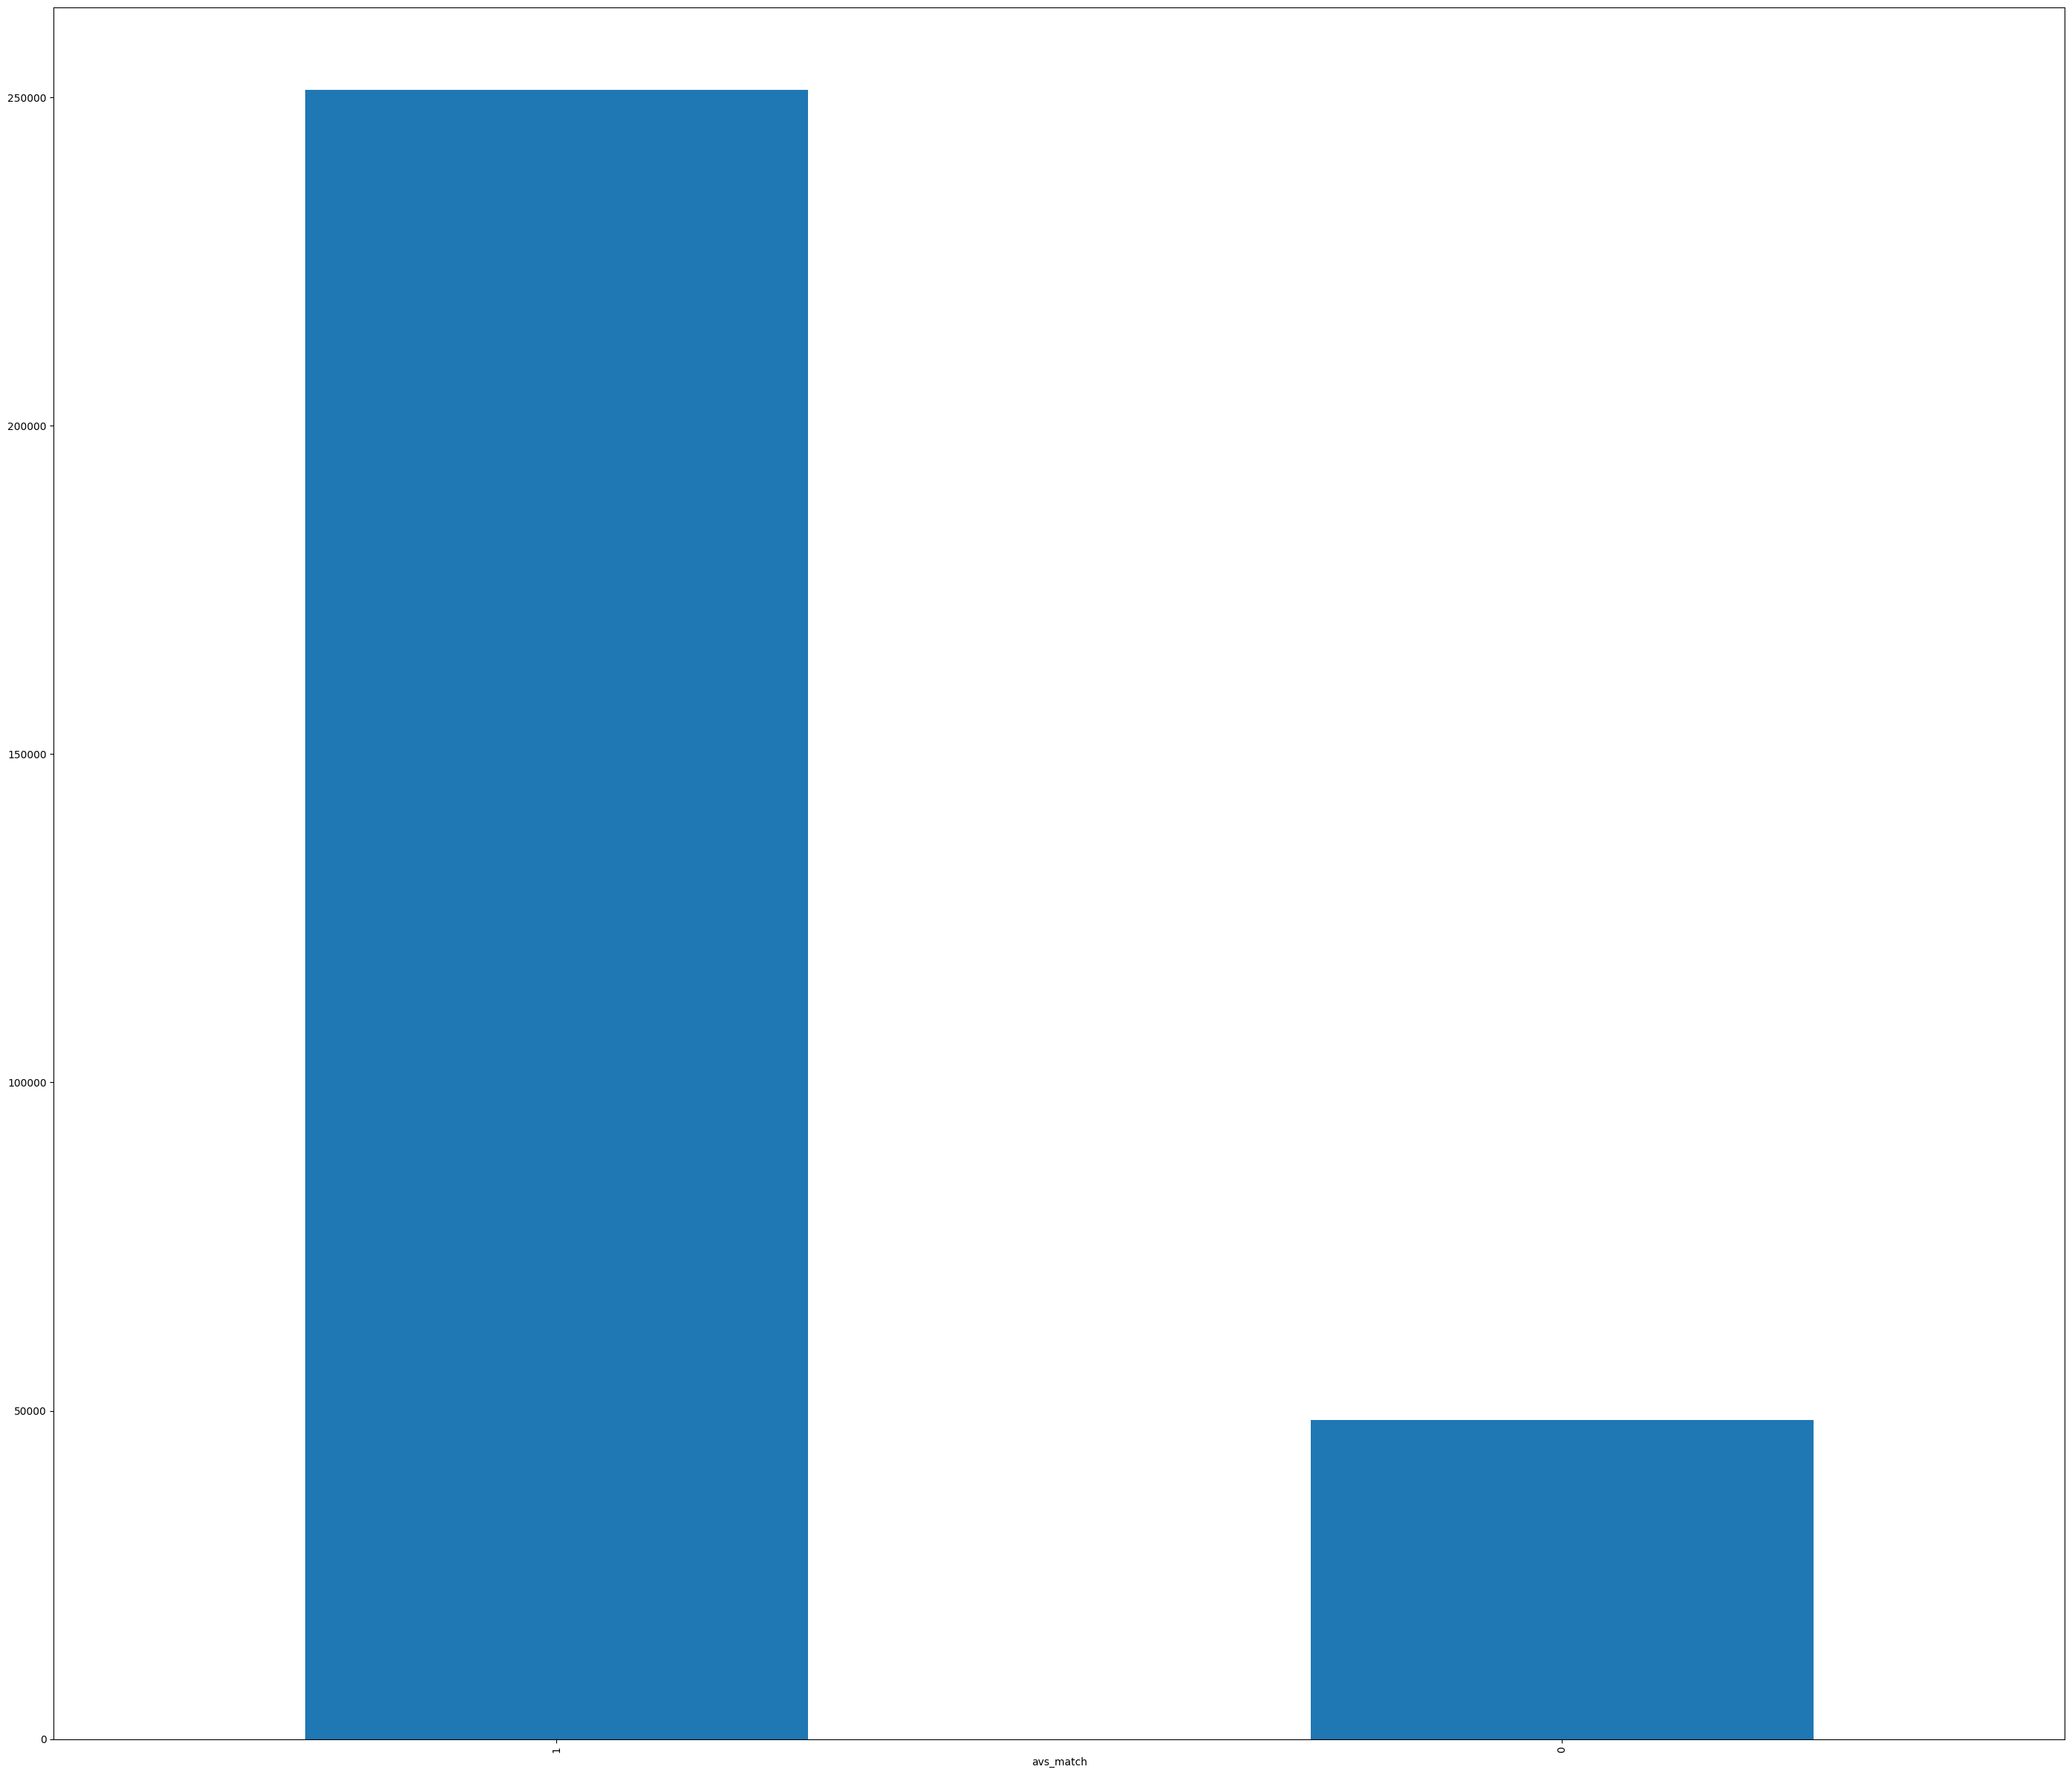

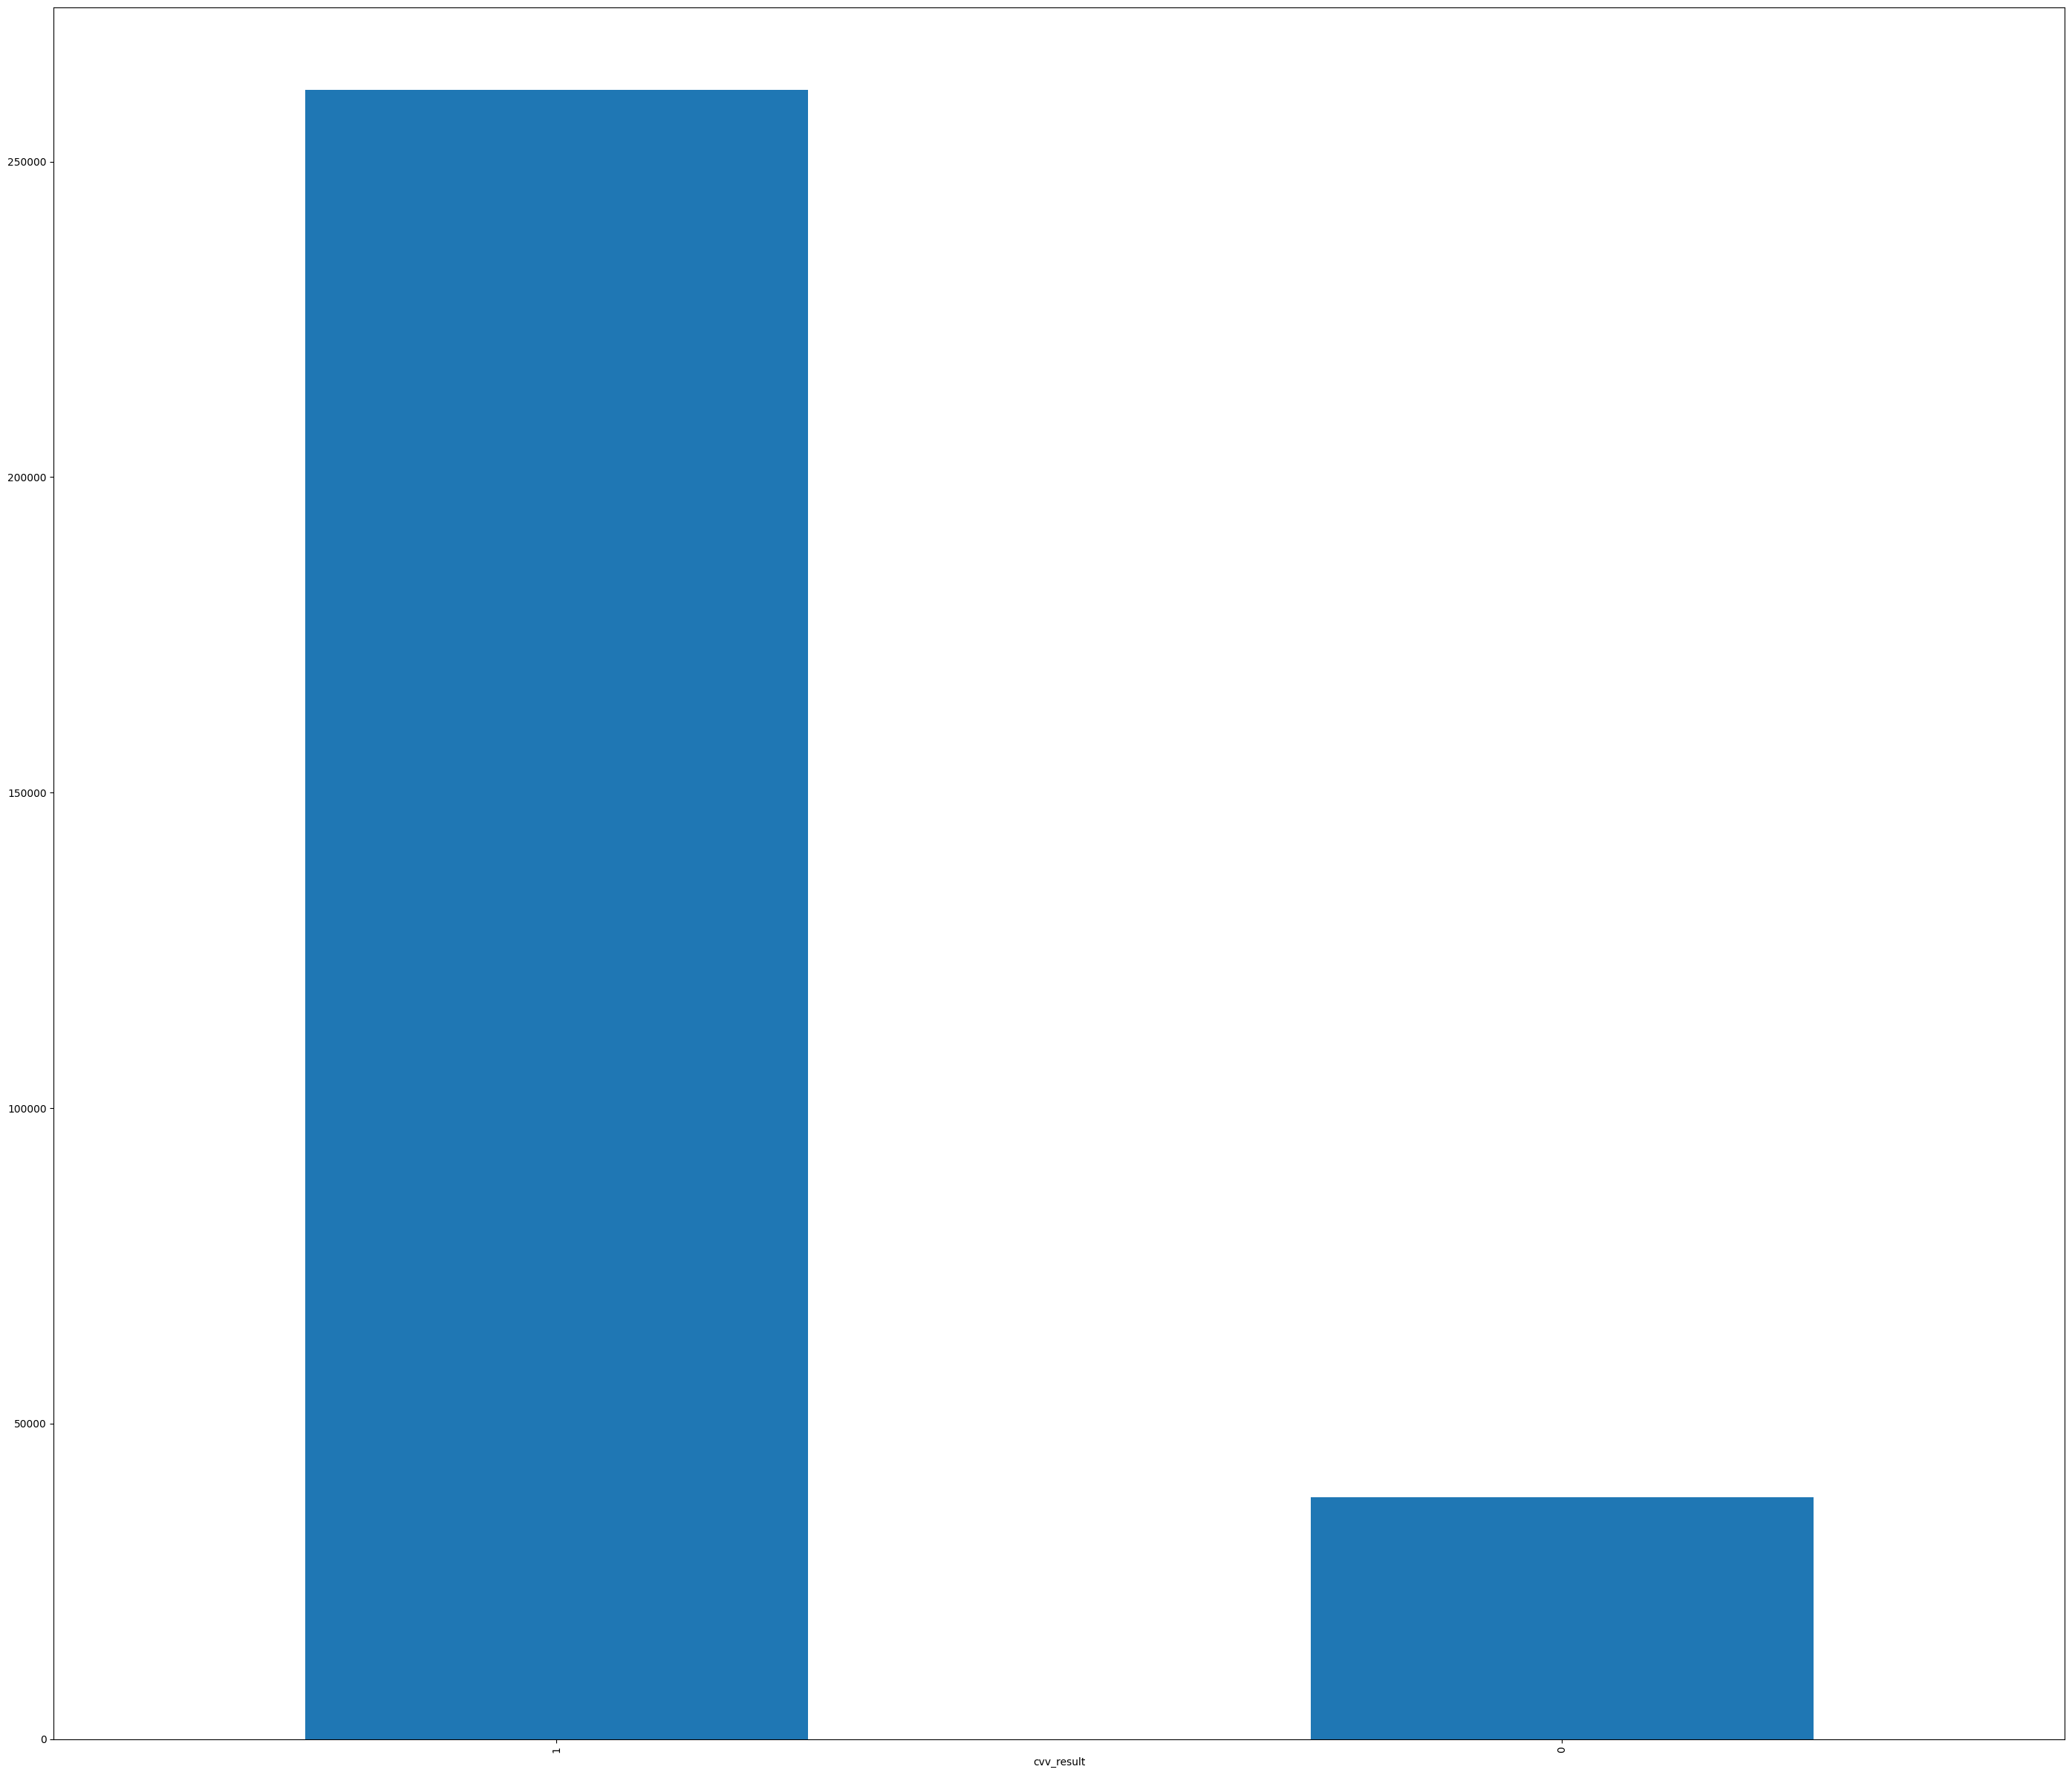

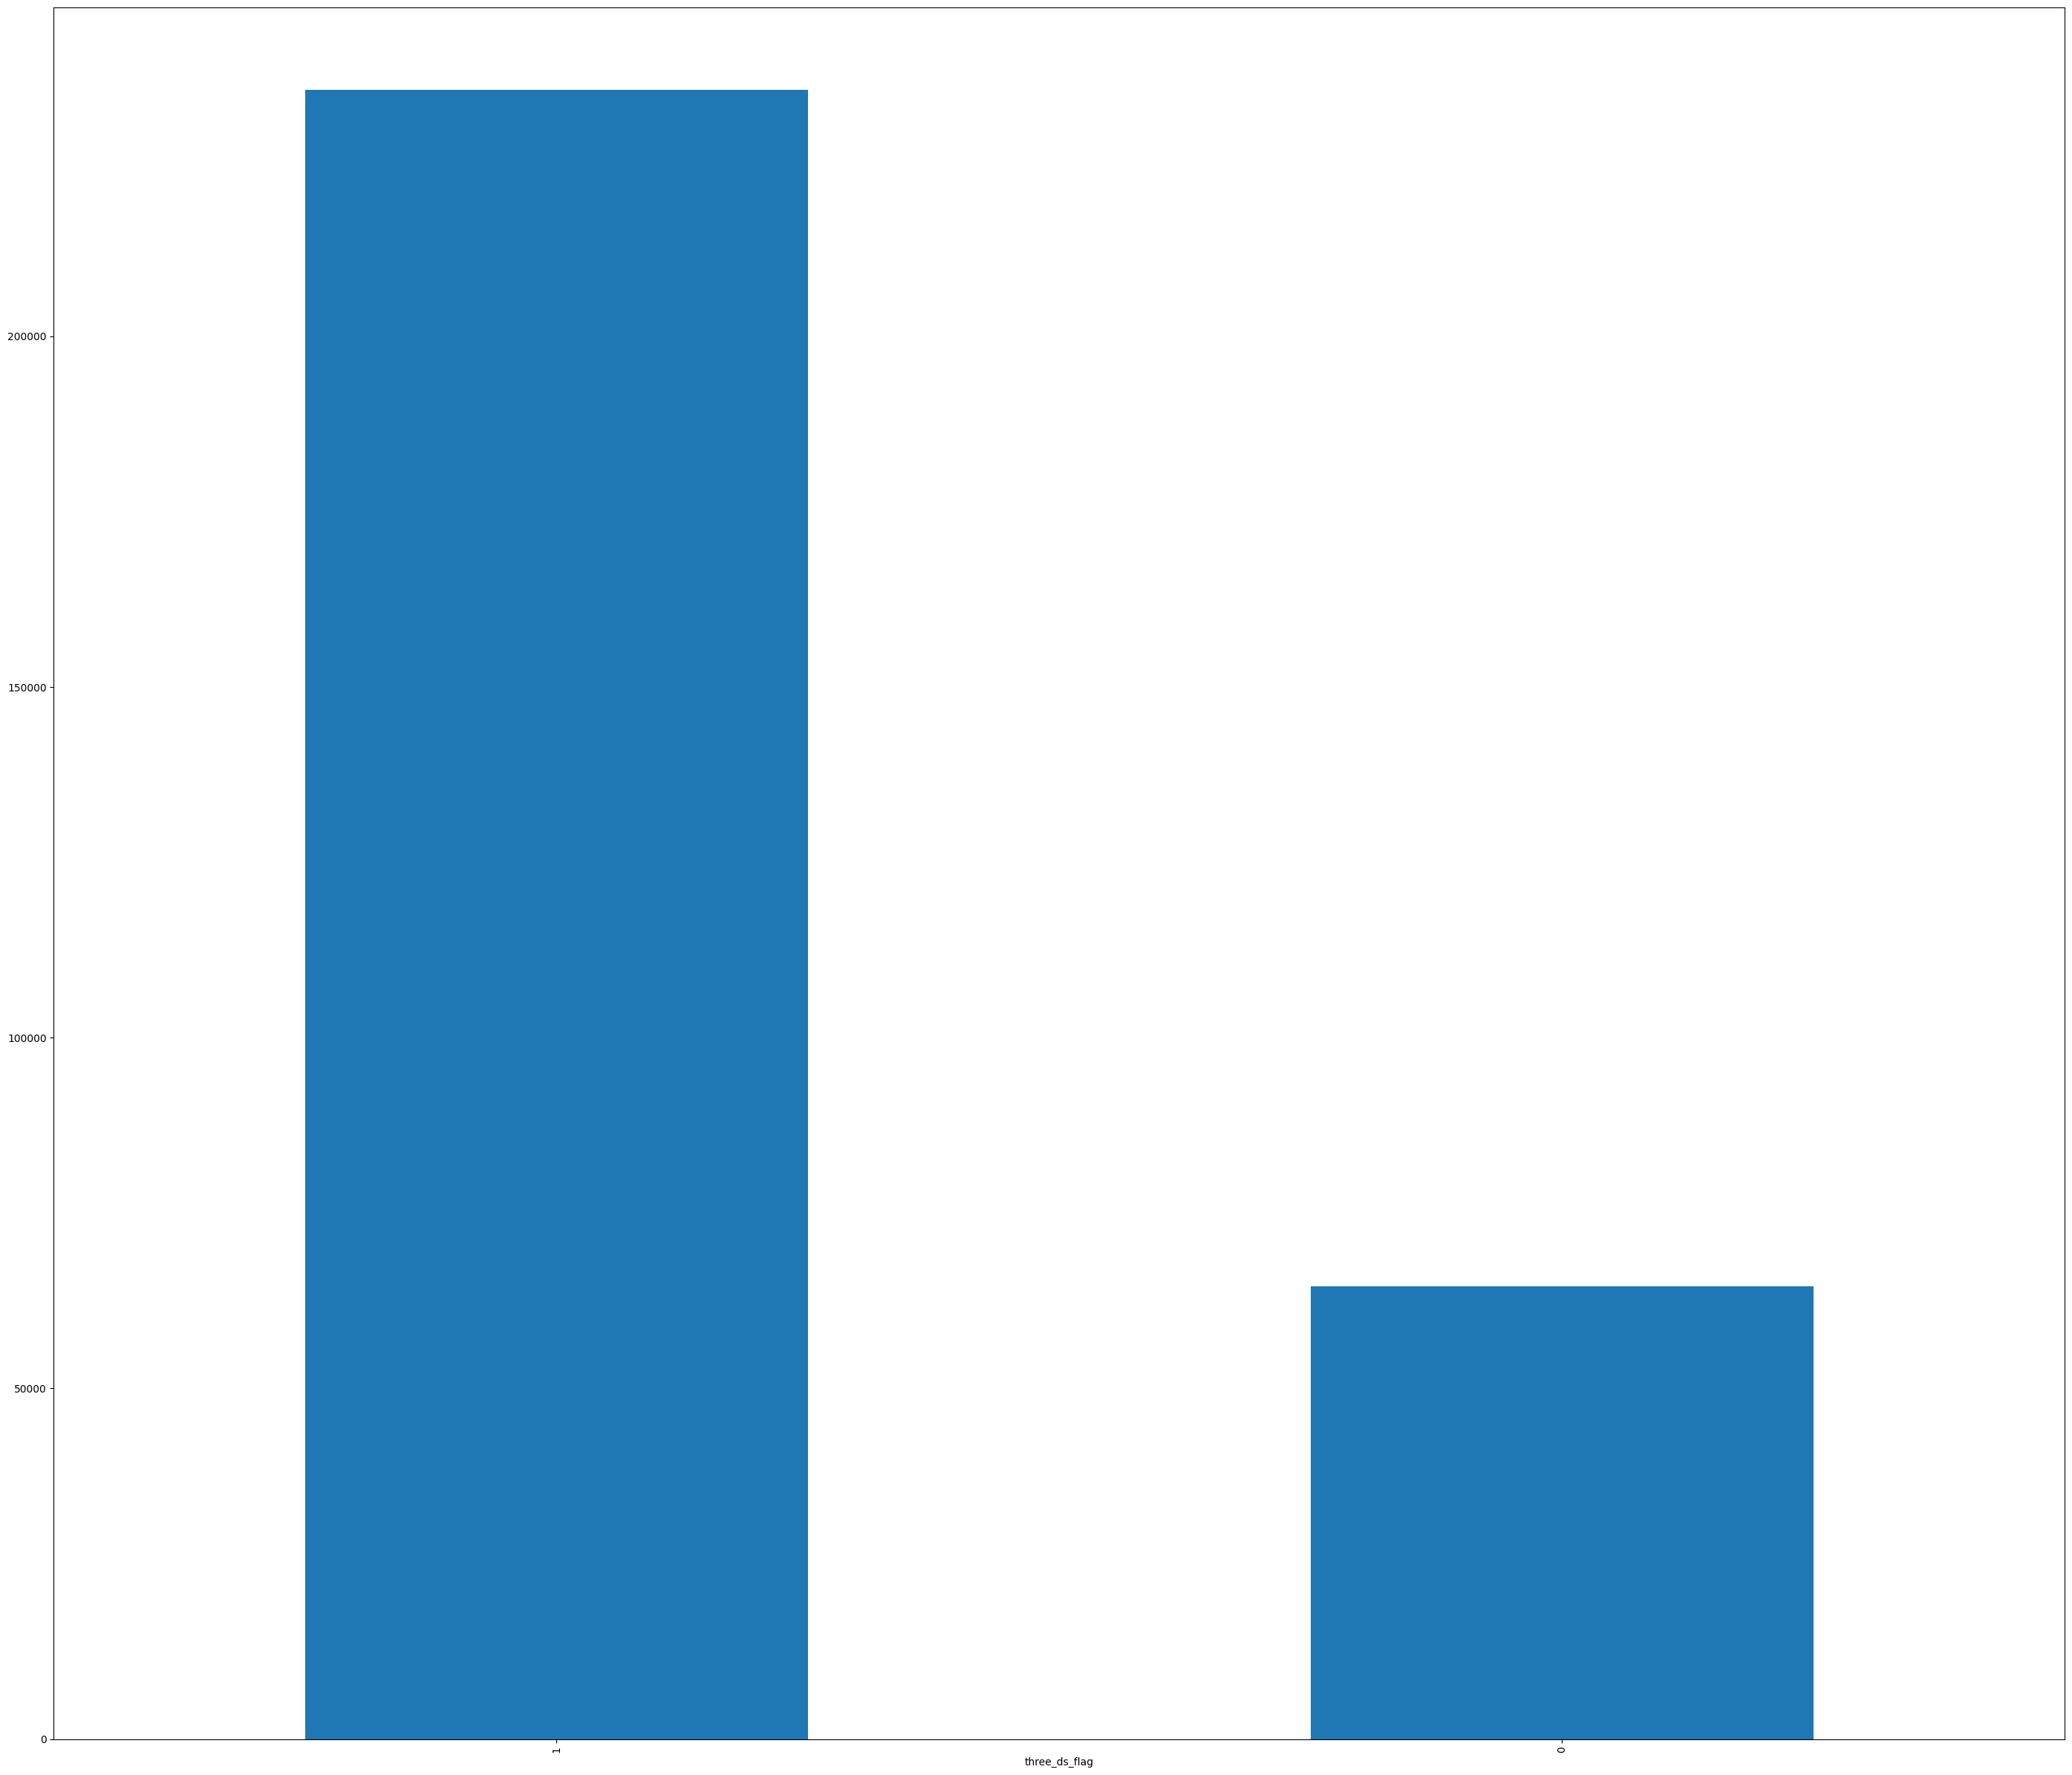

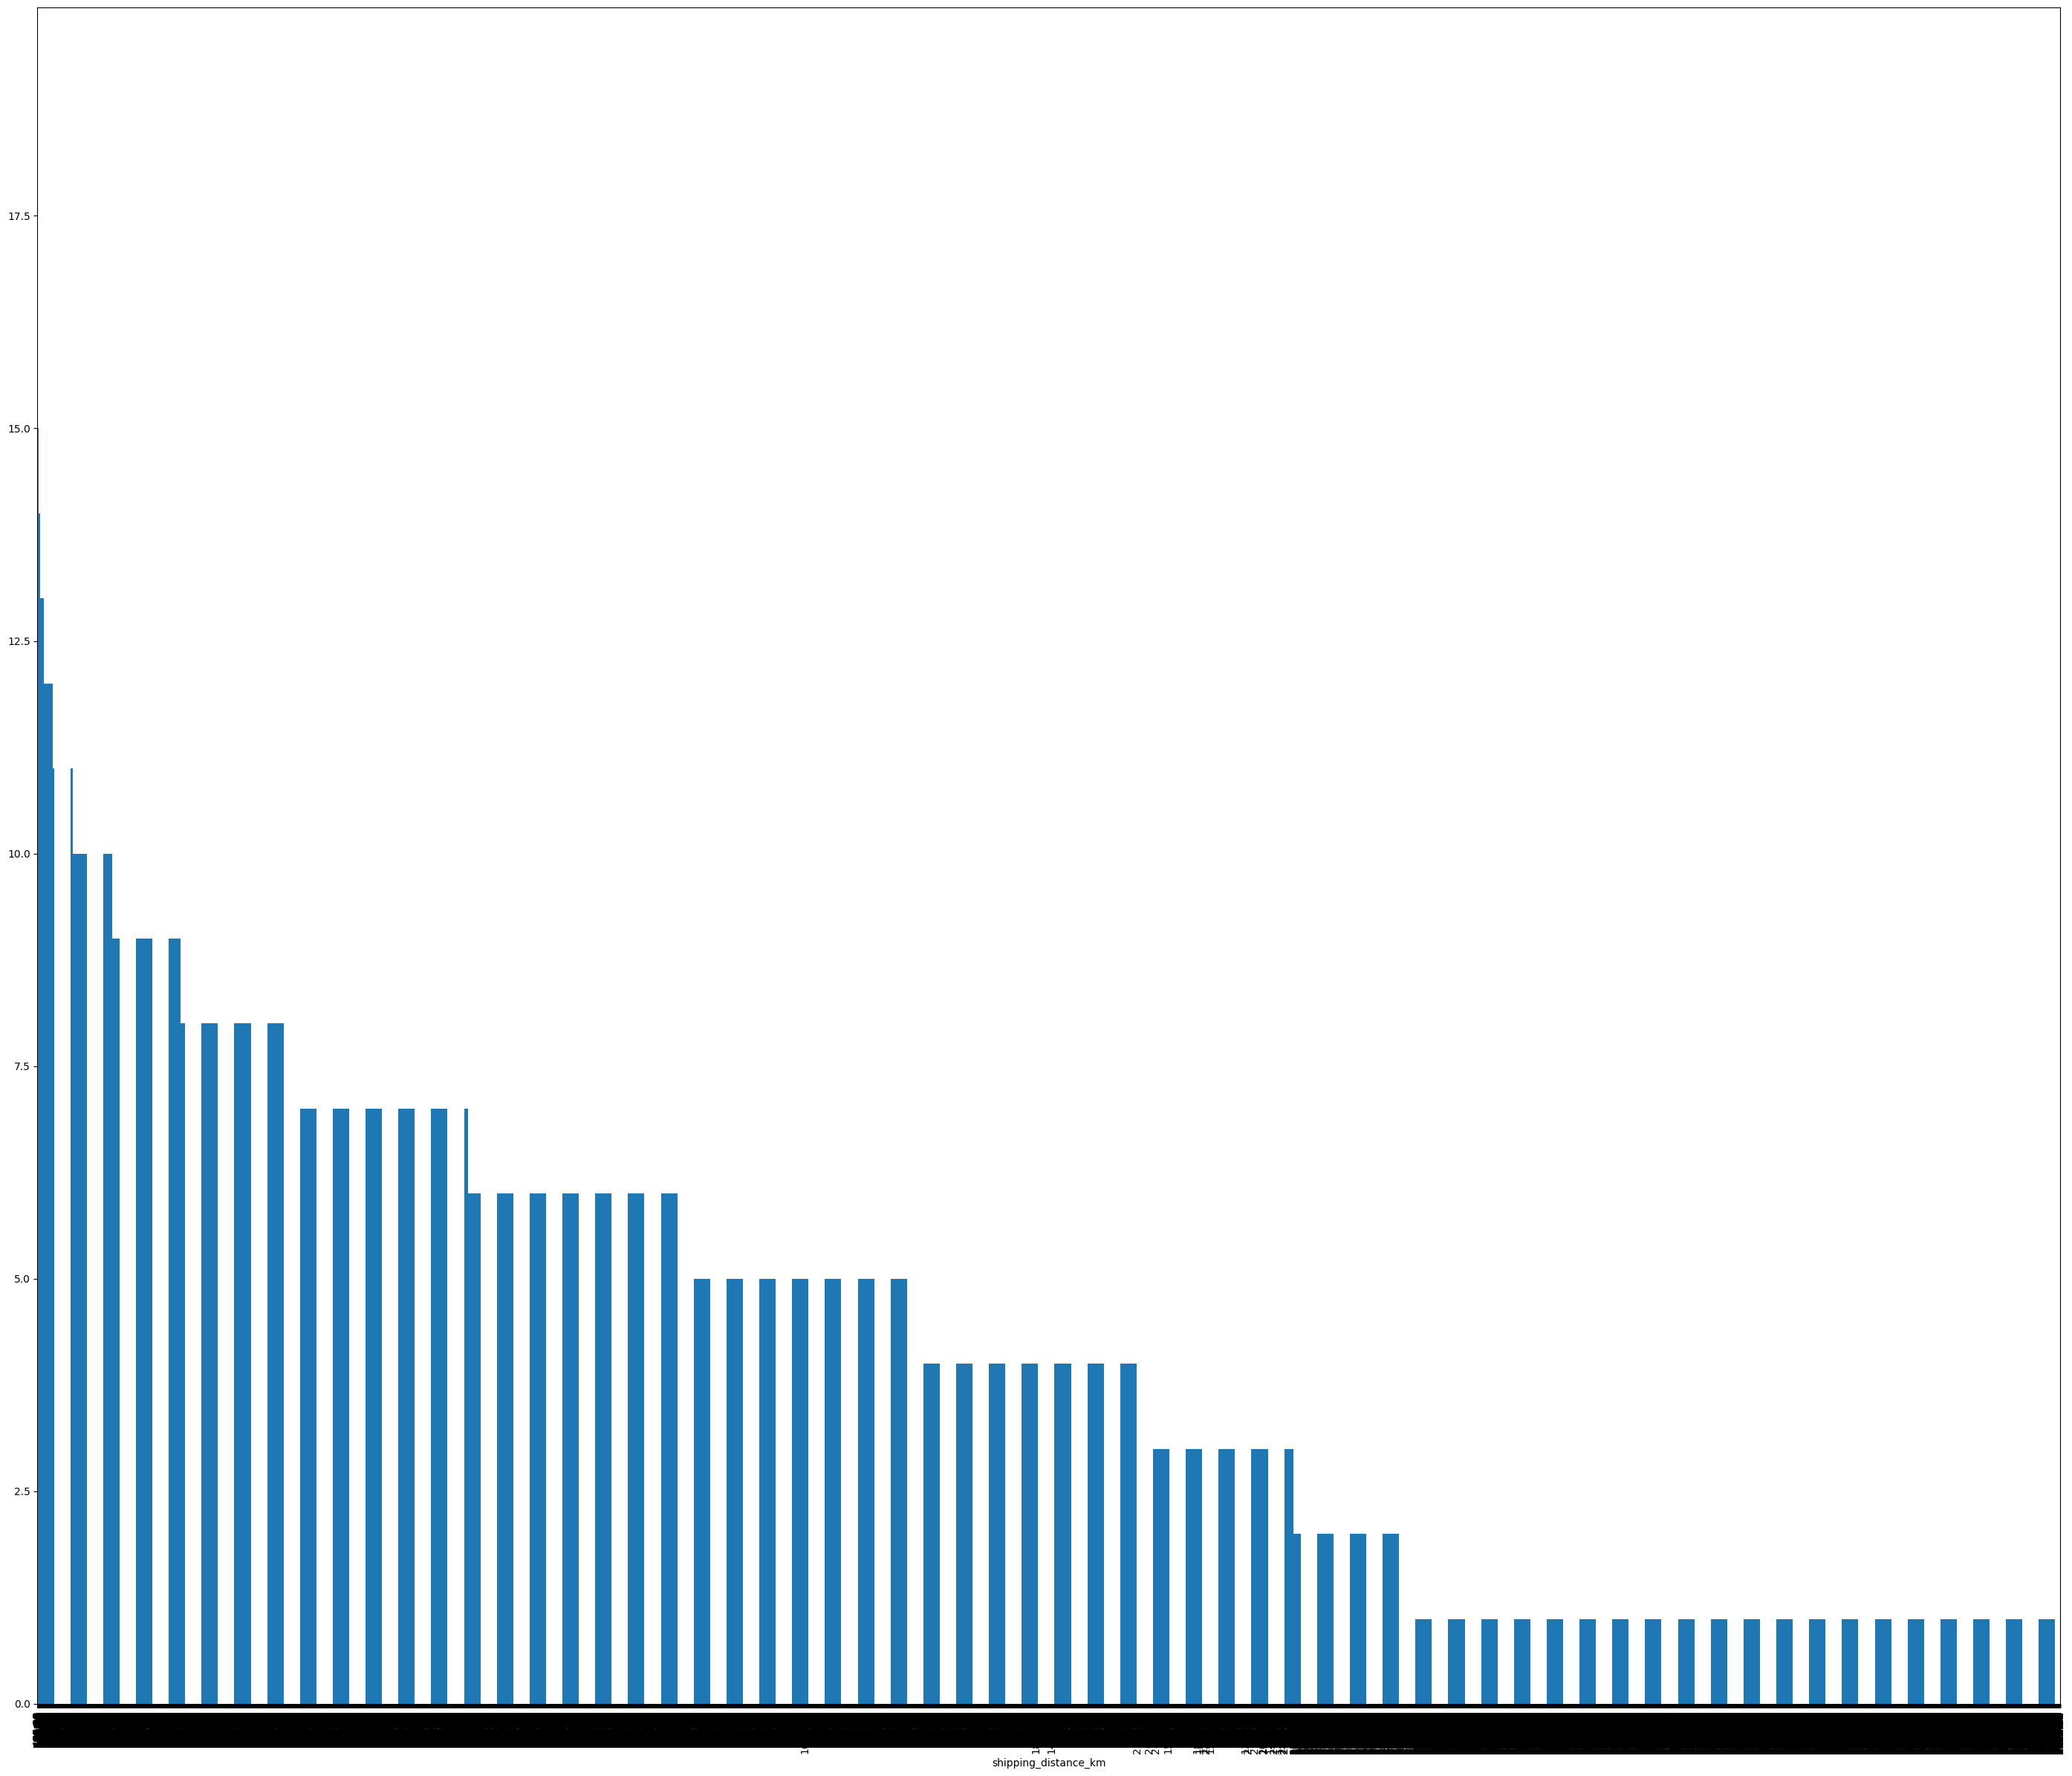

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in numerical_col:
  plt.figure(figsize=(28,24))
  df[c].value_counts().plot(kind='bar')
  plt.tight_layout()
  plt.show()

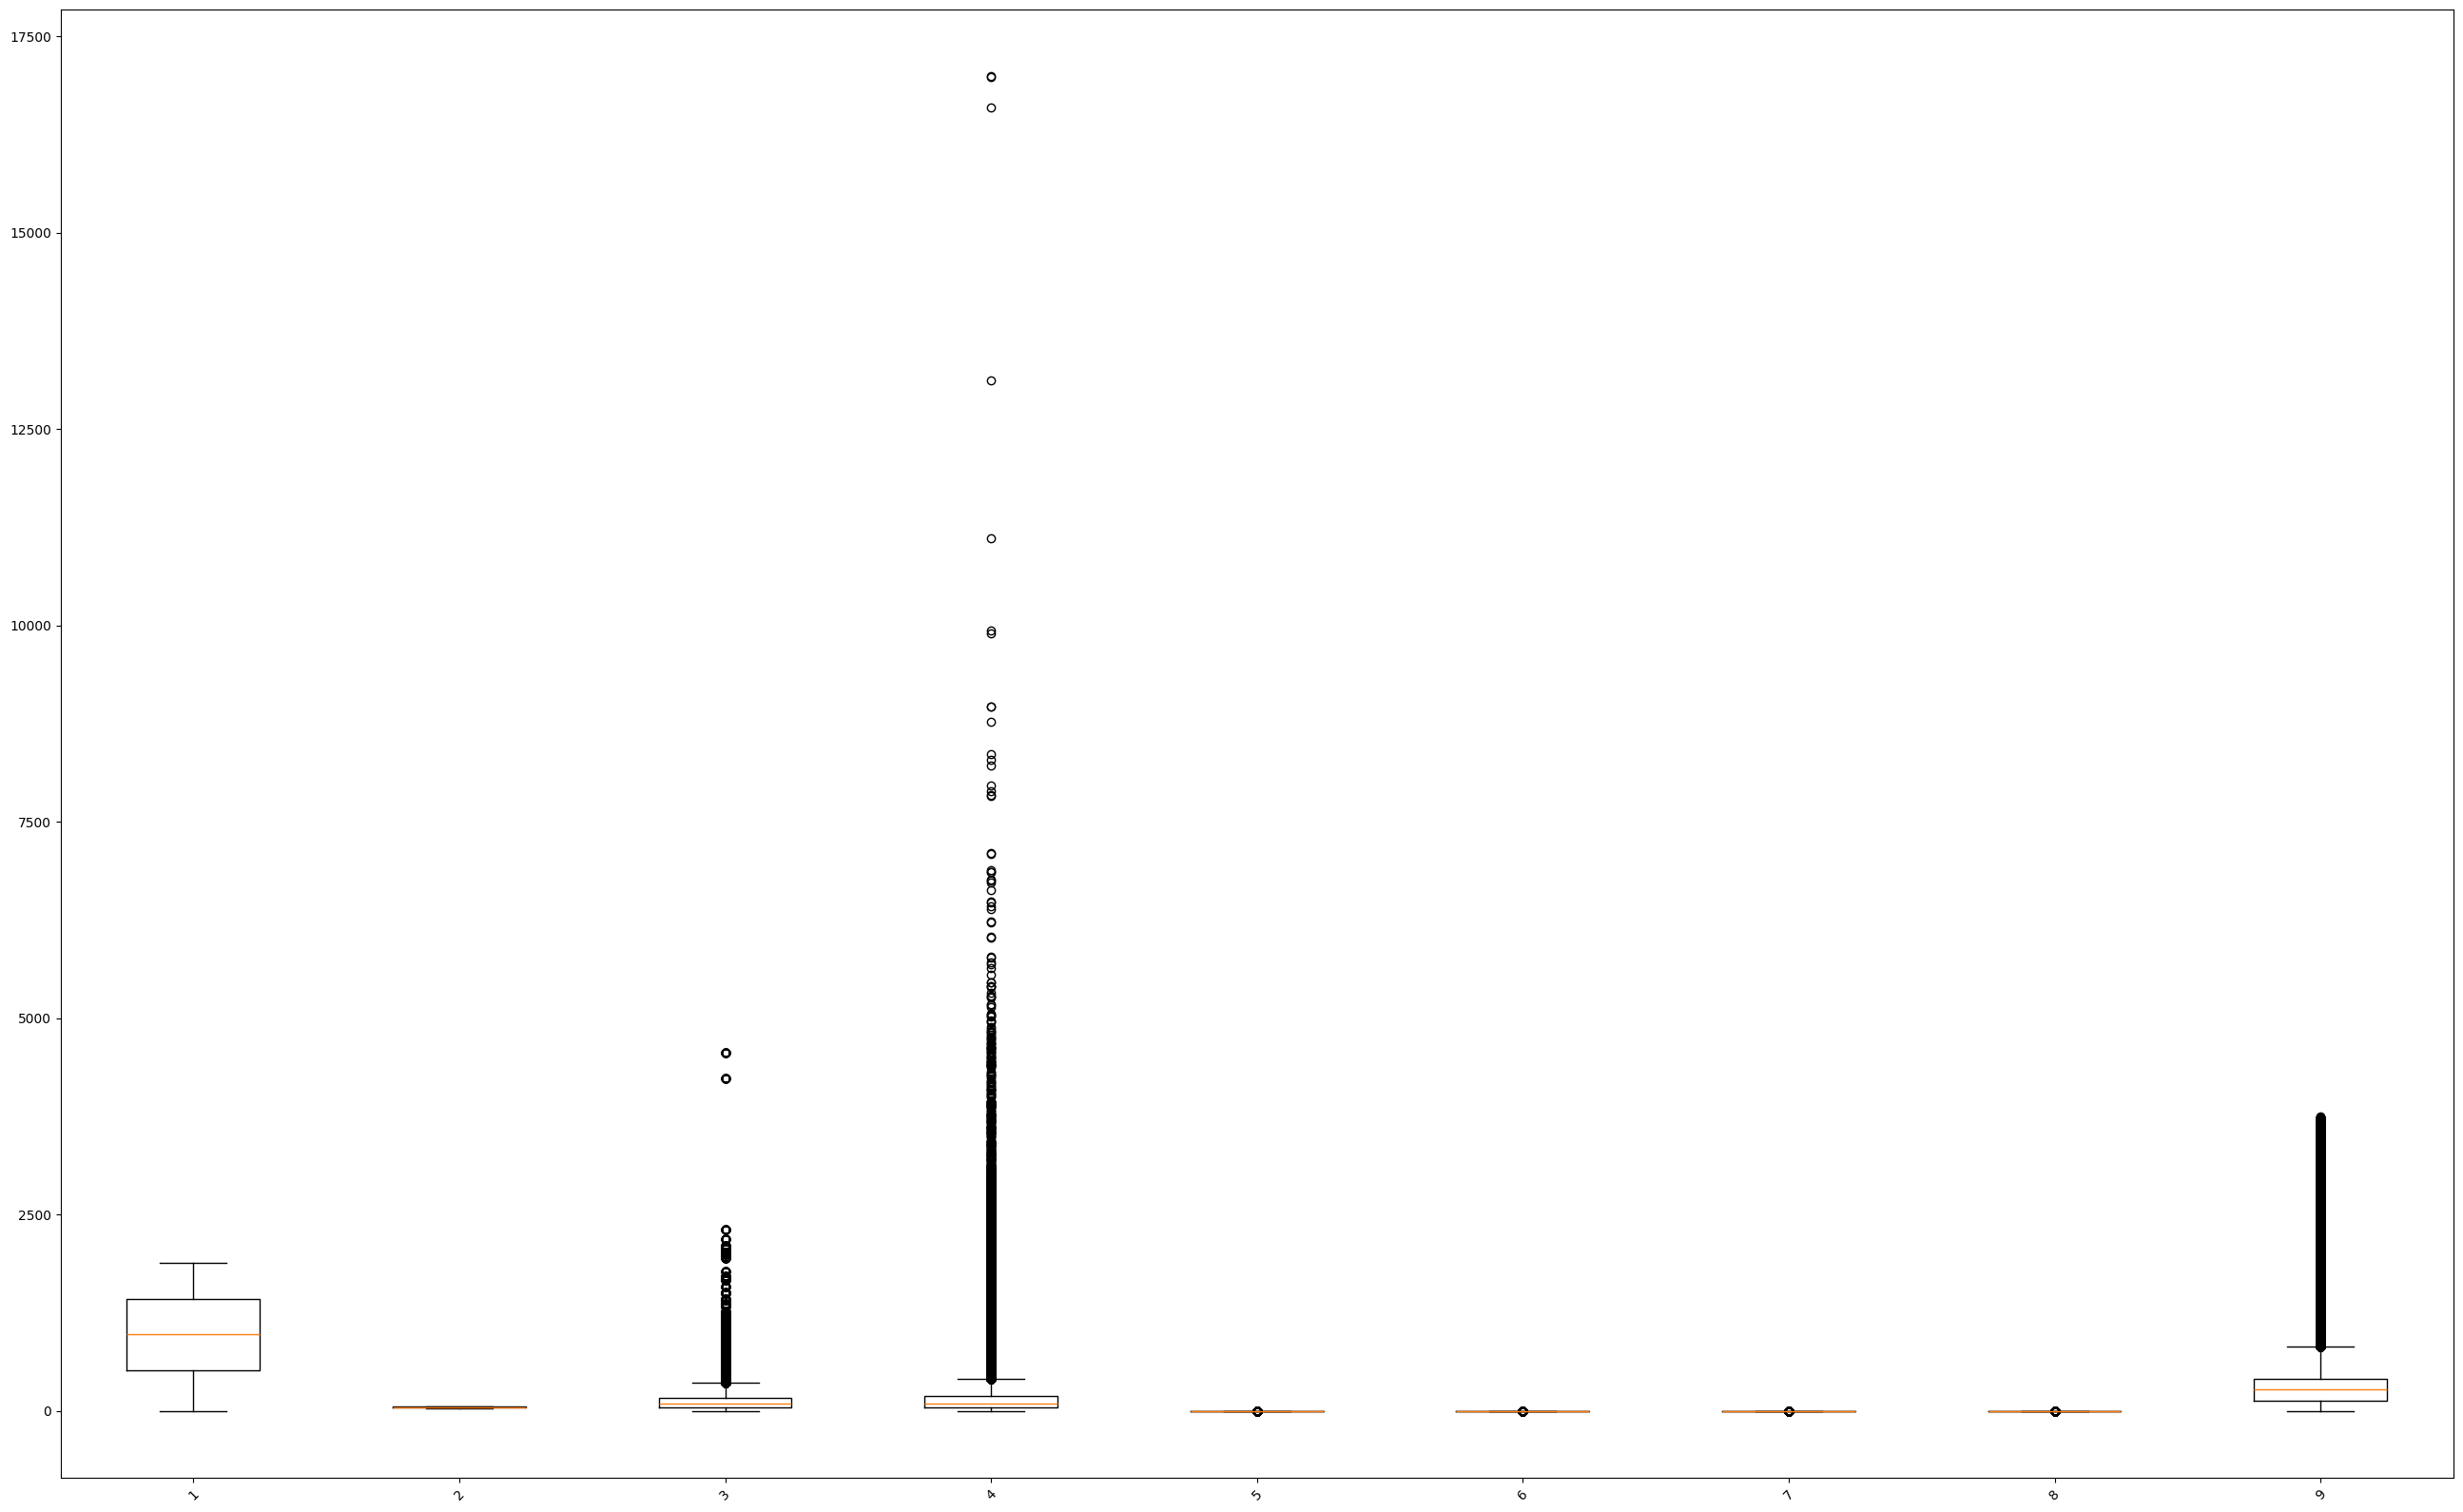

In [15]:
plt.figure(figsize=(26,16))
plt.boxplot(df[numerical_col])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

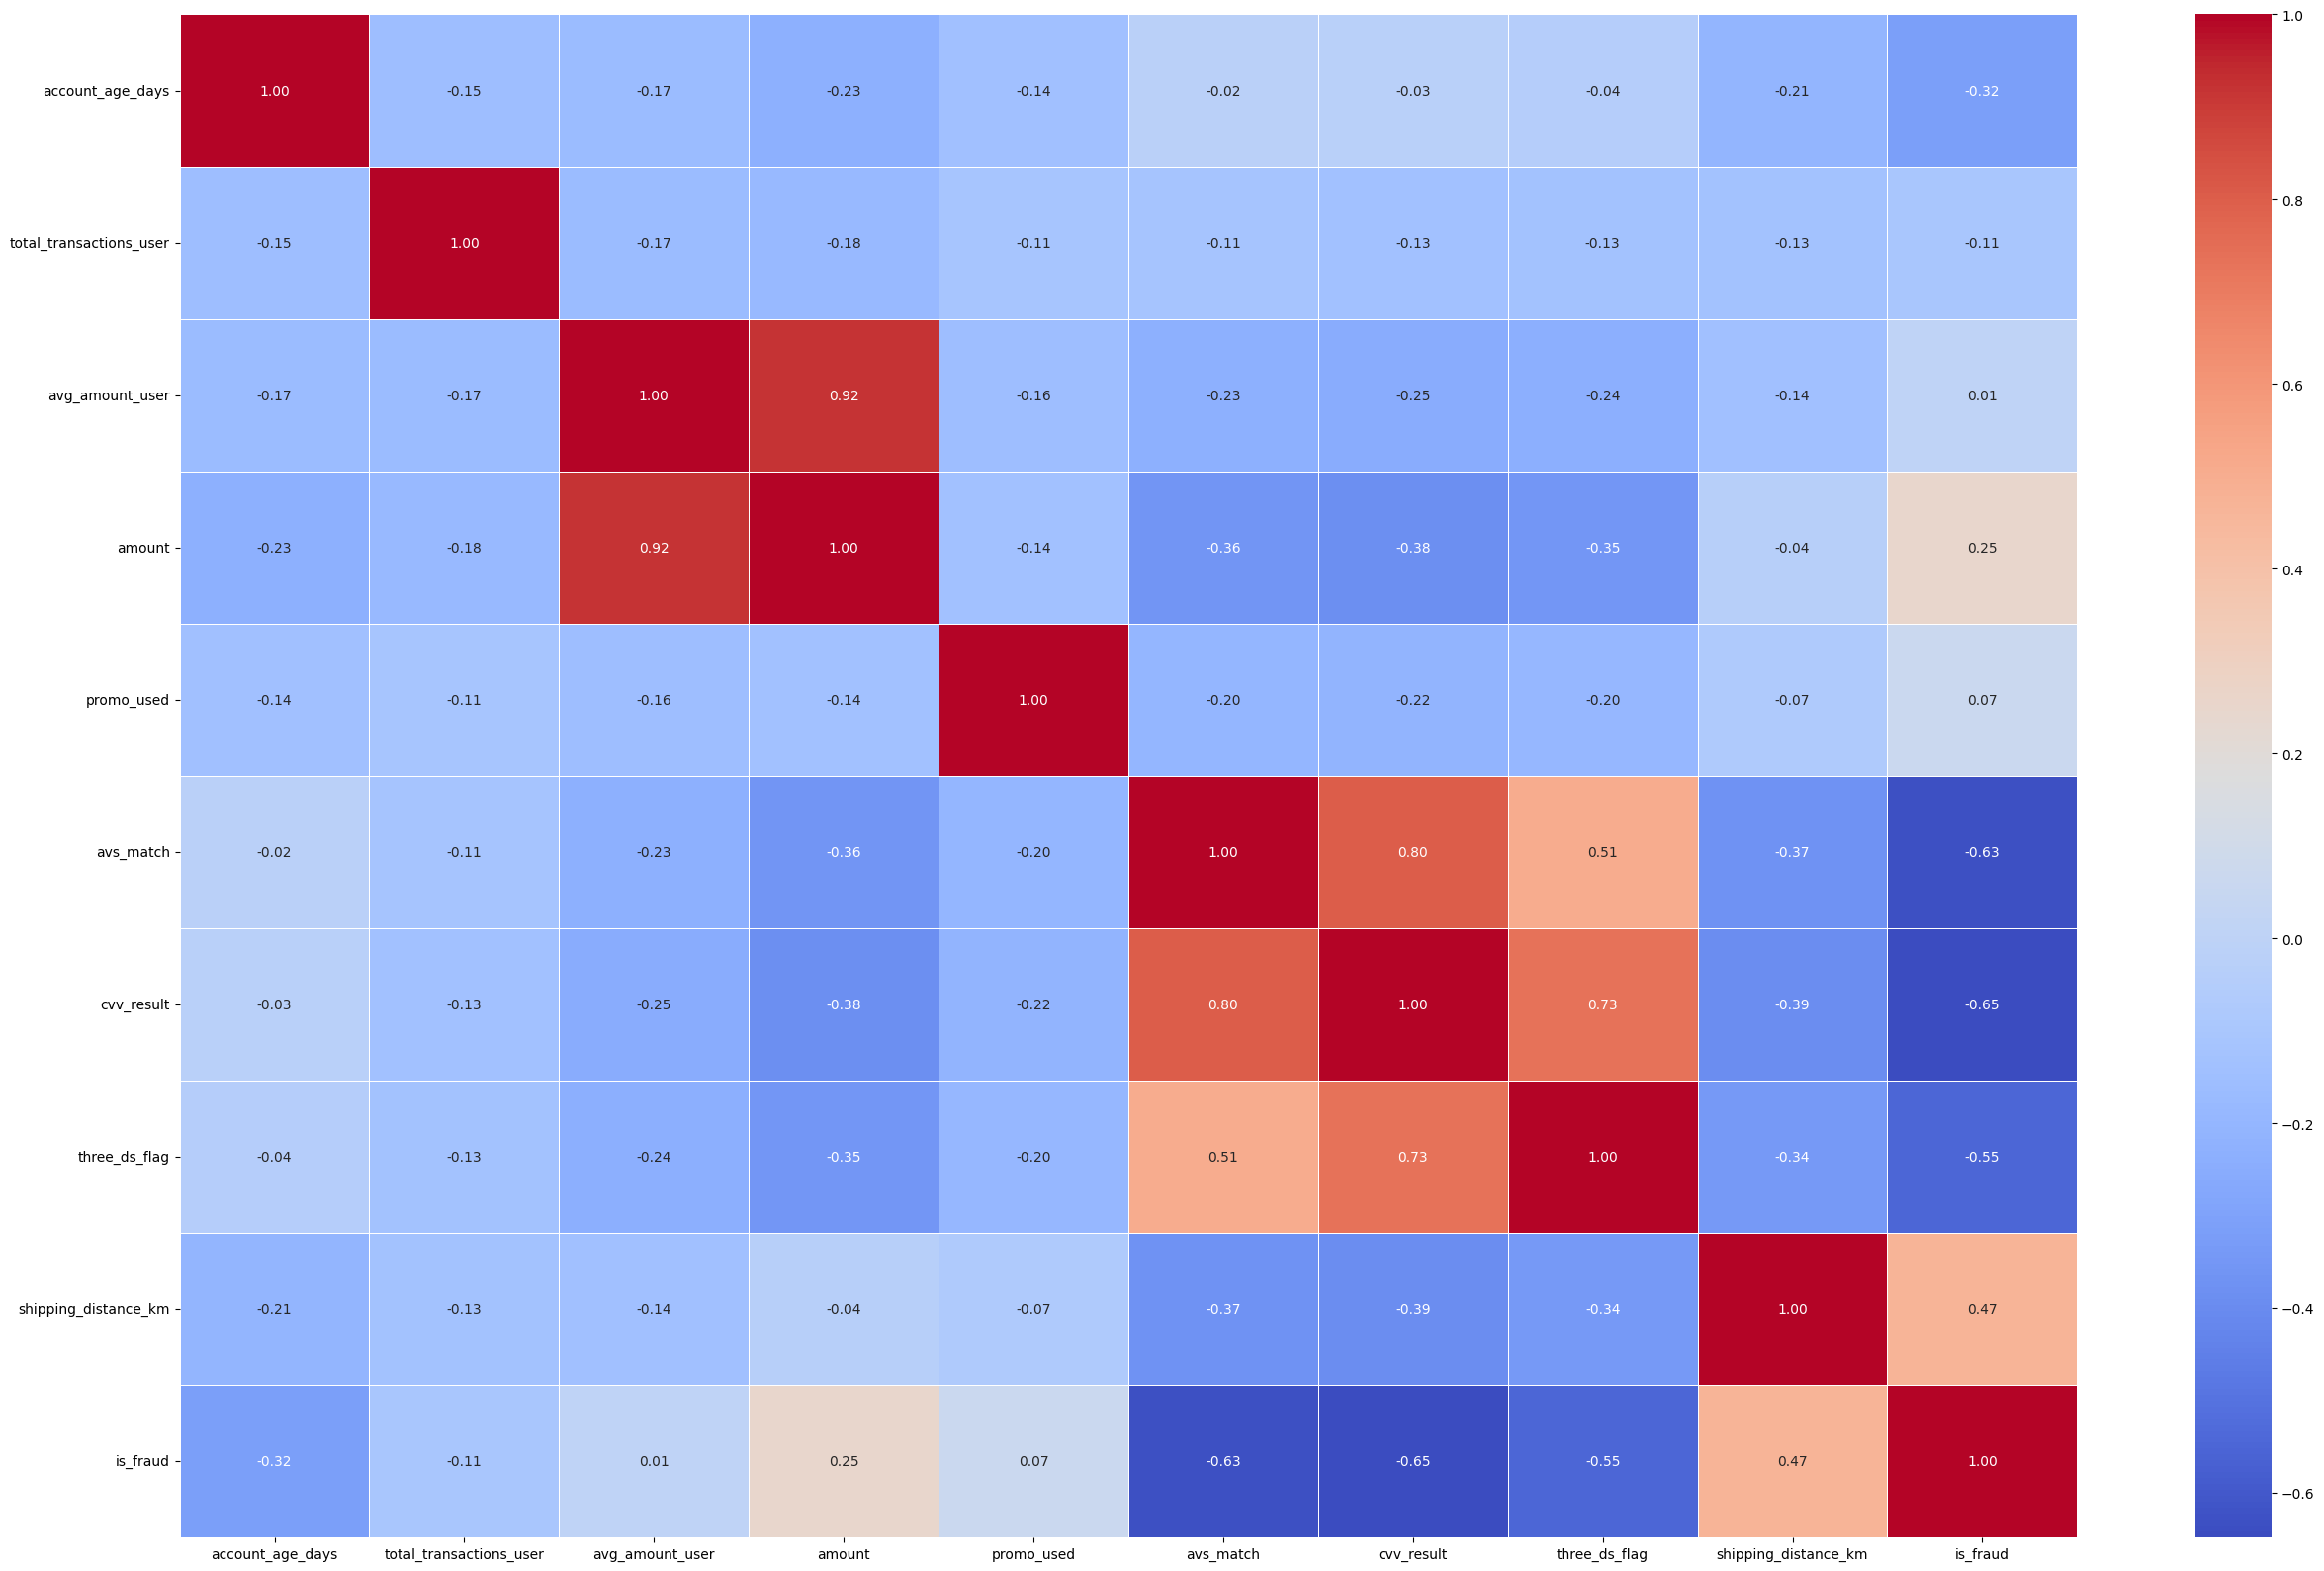

In [45]:
target_col ='is_fraud'
plt.figure(figsize=(26,16))
corr_matrix = df[numerical_col + [target_col]].corr()
sns.heatmap(corr_matrix.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.tight_layout()
plt.show()

In [17]:
df = df.drop('transaction_id',axis=1)

In [18]:
df = df.drop('user_id',axis=1)

In [19]:
df.head()

,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


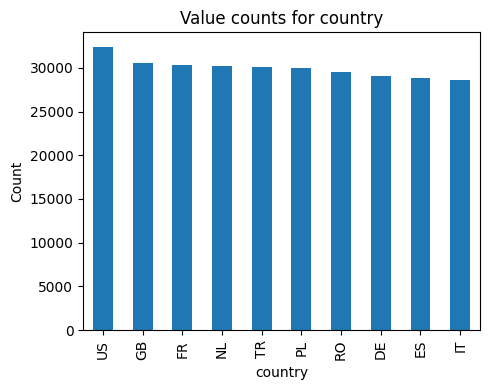

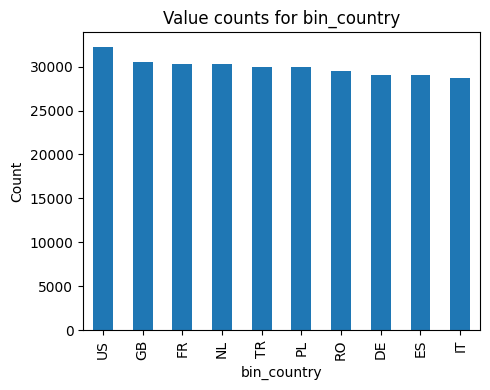

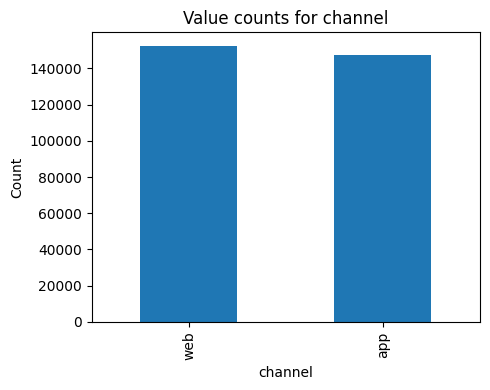

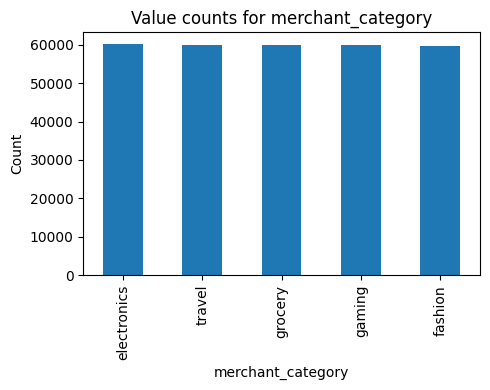

In [20]:
categorical_col = ['country','bin_country','channel','merchant_category']
for c in categorical_col:
  plt.figure(figsize=(5,4))
  df[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["channel"] = le.fit_transform(df["channel"])

In [22]:
df.head()

,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,141,47,147.93,84.75,FR,FR,1,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,141,47,147.93,107.90,FR,FR,1,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,141,47,147.93,92.36,FR,FR,0,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,141,47,147.93,112.47,FR,FR,1,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,141,47,147.93,132.91,FR,US,1,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [27]:
cat_cols = ["country", "bin_country", "merchant_category"]

df_encoded = pd.get_dummies(
    df,
    columns = cat_cols,
    dtype=int
)

In [28]:
df_encoded.head()

,account_age_days,total_transactions_user,avg_amount_user,amount,channel,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,...,bin_country_NL,bin_country_PL,bin_country_RO,bin_country_TR,bin_country_US,merchant_category_electronics,merchant_category_fashion,merchant_category_gaming,merchant_category_grocery,merchant_category_travel
0,141,47,147.93,84.75,1,0,1,1,1,2024-01-06T04:09:39Z,...,0,0,0,0,0,0,0,0,0,1
1,141,47,147.93,107.90,1,0,0,0,0,2024-01-09T20:13:47Z,...,0,0,0,0,0,0,0,0,0,1
2,141,47,147.93,92.36,0,1,1,1,1,2024-01-12T06:20:11Z,...,0,0,0,0,0,0,0,0,0,1
3,141,47,147.93,112.47,1,0,1,1,1,2024-01-15T17:00:04Z,...,0,0,0,0,0,0,1,0,0,0
4,141,47,147.93,132.91,1,0,1,1,1,2024-01-17T01:27:31Z,...,0,0,0,0,1,1,0,0,0,0


In [29]:
df_encoded = df_encoded.drop("transaction_time", axis=1)

In [30]:
df_encoded.head()

,account_age_days,total_transactions_user,avg_amount_user,amount,channel,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,...,bin_country_NL,bin_country_PL,bin_country_RO,bin_country_TR,bin_country_US,merchant_category_electronics,merchant_category_fashion,merchant_category_gaming,merchant_category_grocery,merchant_category_travel
0,141,47,147.93,84.75,1,0,1,1,1,370.95,...,0,0,0,0,0,0,0,0,0,1
1,141,47,147.93,107.90,1,0,0,0,0,149.62,...,0,0,0,0,0,0,0,0,0,1
2,141,47,147.93,92.36,0,1,1,1,1,164.08,...,0,0,0,0,0,0,0,0,0,1
3,141,47,147.93,112.47,1,0,1,1,1,397.40,...,0,0,0,0,0,0,1,0,0,0
4,141,47,147.93,132.91,1,0,1,1,1,935.28,...,0,0,0,0,1,1,0,0,0,0


In [31]:
col = "amount"
Q1 = df_encoded[col].quantile(0.25)
Q3 = df_encoded[col].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df_encoded[(df_encoded[col]<lower) | (df_encoded[col]>upper)]
print(f"Numer of detected outliers in {col}: ", len(outliers))

Numer of detected outliers in amount:  26711


In [33]:
df_log = df_encoded.copy()
df_log[col + "_log"] = np.log(df_log[col]+1)
print(df_log)

        account_age_days  total_transactions_user  avg_amount_user  amount  \
0                    141                       47           147.93   84.75   
1                    141                       47           147.93  107.90   
2                    141                       47           147.93   92.36   
3                    141                       47           147.93  112.47   
4                    141                       47           147.93  132.91   
...                  ...                      ...              ...     ...   
299690               996                       45            27.93   34.07   
299691               996                       45            27.93   68.56   
299692               996                       45            27.93   25.02   
299693               996                       45            27.93   23.92   
299694               996                       45            27.93   26.07   

        channel  promo_used  avs_match  cvv_result  three_ds_fl

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numeric and categorical columns for the pipeline
num_features = ['account_age_days','total_transactions_user',
                 'avg_amount_user','amount','promo_used','avs_match','cvv_result',
                 'three_ds_flag','shipping_distance_km']
cat_features = ["country", "bin_country", "merchant_category"]

# Numeric pipeline
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("ohe",OneHotEncoder(drop="first"))
])

# Combine both
preprocess = ColumnTransformer([
    ("num",num_pipeline,num_features),
    ("cat",cat_pipeline,cat_features)
])

# Full pipeline with a simple model
clf = Pipeline([
   ("prep",preprocess),
   ("model",LogisticRegression(max_iter=1000))
])


In [38]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Target column
target_col = "is_fraud"
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create pipeline
clf = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Fit the pipeline
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Logistic Regression with preprocessing pipeline Accuracy:", acc)
print(classification_report(y_test, y_pred))


Logistic Regression with preprocessing pipeline Accuracy: 0.9854652714750948
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     73328
           1       0.83      0.40      0.54      1596

    accuracy                           0.99     74924
   macro avg       0.91      0.70      0.77     74924
weighted avg       0.98      0.99      0.98     74924



In [41]:
df.to_csv("my_data.csv", index=False)
print("CSV file created successfully!")

CSV file created successfully!
